In [121]:
library(quantmod)
library(highfrequency)
library(fst)
library(lubridate)
library(xts)
library(rugarch)

### 1

In [122]:
# 1,2 load data
MSFT<-read.fst(path = "C:/Users/Uzivatel/Documents/New_component/IES/2022_2023/Financial_econometrics_I/Homework3/HW_3_MSFT_1min.fst")
MSFT<-xts(MSFT$V1,order.by = MSFT$index)
BAC<-read.fst(path = "C:/Users/Uzivatel/Documents/New_component/IES/2022_2023/Financial_econometrics_I/Homework3/HW_3_BAC_1min.fst")
BAC<-xts(BAC$V1,order.by = BAC$index)
XOM<-read.fst(path = "C:/Users/Uzivatel/Documents/New_component/IES/2022_2023/Financial_econometrics_I/Homework3/HW_3_XOM_1min.fst")
XOM<-xts(XOM$V1,order.by = XOM$index)

In [123]:
str(BAC)
head(BAC)

An xts object on 2010-01-04 07:00:00 / 2017-12-29 17:59:00 containing: 
  Data:    double [1134050, 1]
  Index:   POSIXct,POSIXt [1134050] (TZ: "UTC")


Warning message:
"object timezone (UTC) is different from system timezone ()"


                       [,1]
2010-01-04 07:00:00 14.0864
2010-01-04 07:04:00 14.0864
2010-01-04 07:06:00 14.0679
2010-01-04 07:08:00 14.0586
2010-01-04 07:13:00 14.0772
2010-01-04 07:21:00 14.1050

### 2

In [124]:
#  Subset the data to include only years 2012-2016
BAC <- BAC["2012/2016"]

# Subset the data to include only NYSE trading hours (9:30-16:00)
BAC <- BAC["T09:30:00/T16:00:00"]

In [125]:
# Subset the data to include only years 2012-2016
MSFT <- MSFT["2012/2016"]
XOM <- XOM["2012/2016"]

# Subset the data to include only NYSE trading hours (9:30-16:00)
MSFT <- MSFT["T09:30:00/T16:00:00"]
XOM <- XOM["T09:30:00/T16:00:00"]

In [126]:
head(BAC)

Warning message:
"object timezone (UTC) is different from system timezone ()"


                      [,1]
2012-01-03 09:30:00 5.3773
2012-01-03 09:31:00 5.3773
2012-01-03 09:32:00 5.3960
2012-01-03 09:33:00 5.4147
2012-01-03 09:34:00 5.4240
2012-01-03 09:35:00 5.4334

### 3

In [127]:
daily<-unique(as.Date(index(BAC)))
BAC_returns<- do.call(rbind,lapply(1:length(daily), function(x) makeReturns(BAC[as.character(daily[x])])))
                                   
daily<-unique(as.Date(index(MSFT)))
MSFT_returns<- do.call(rbind,lapply(1:length(daily), function(x) makeReturns(MSFT[as.character(daily[x])])))
                                   
daily<-unique(as.Date(index(XOM)))
XOM_returns<- do.call(rbind,lapply(1:length(daily), function(x) makeReturns(XOM[as.character(daily[x])])))

In [128]:
str(BAC_returns)
head(BAC_returns)

An xts object on 2012-01-03 09:30:00 / 2016-12-30 16:00:00 containing: 
  Data:    double [490419, 1]
  Index:   POSIXct,POSIXt [490419] (TZ: "UTC")


Warning message:
"object timezone (UTC) is different from system timezone ()"


                           [,1]
2012-01-03 09:30:00 0.000000000
2012-01-03 09:31:00 0.000000000
2012-01-03 09:32:00 0.003471549
2012-01-03 09:33:00 0.003459539
2012-01-03 09:34:00 0.001716073
2012-01-03 09:35:00 0.001731538

### 4

In [129]:
RV_price_BAC<-rCov(BAC,makeReturns = TRUE)
index(RV_price_BAC)<-as.Date(index(RV_price_BAC))

RV_ret_BAC<-rCov(BAC_returns,makeReturns = FALSE)
index(RV_ret_BAC)<-as.Date(index(RV_ret_BAC))


RV_price_MSFT<-rCov(MSFT,makeReturns = TRUE)
index(RV_price_MSFT)<-as.Date(index(RV_price_MSFT))

RV_ret_MSFT<-rCov(MSFT_returns,makeReturns = FALSE)
index(RV_ret_MSFT)<-as.Date(index(RV_ret_MSFT))


RV_price_XOM<-rCov(XOM,makeReturns = TRUE)
index(RV_price_XOM)<-as.Date(index(RV_price_XOM))

RV_ret_XOM<-rCov(XOM_returns,makeReturns = FALSE)
index(RV_ret_MSFT)<-as.Date(index(RV_ret_MSFT))

In [130]:
head(RV_price_BAC)
head(RV_ret_BAC)

                   [,1]
2012-01-03 0.0007787649
2012-01-04 0.0010187267
2012-01-05 0.0015620921
2012-01-06 0.0011918156
2012-01-09 0.0008431192
2012-01-10 0.0007357003

                   [,1]
2012-01-03 0.0007787649
2012-01-04 0.0010187267
2012-01-05 0.0015620921
2012-01-06 0.0011918156
2012-01-09 0.0008431192
2012-01-10 0.0007357003

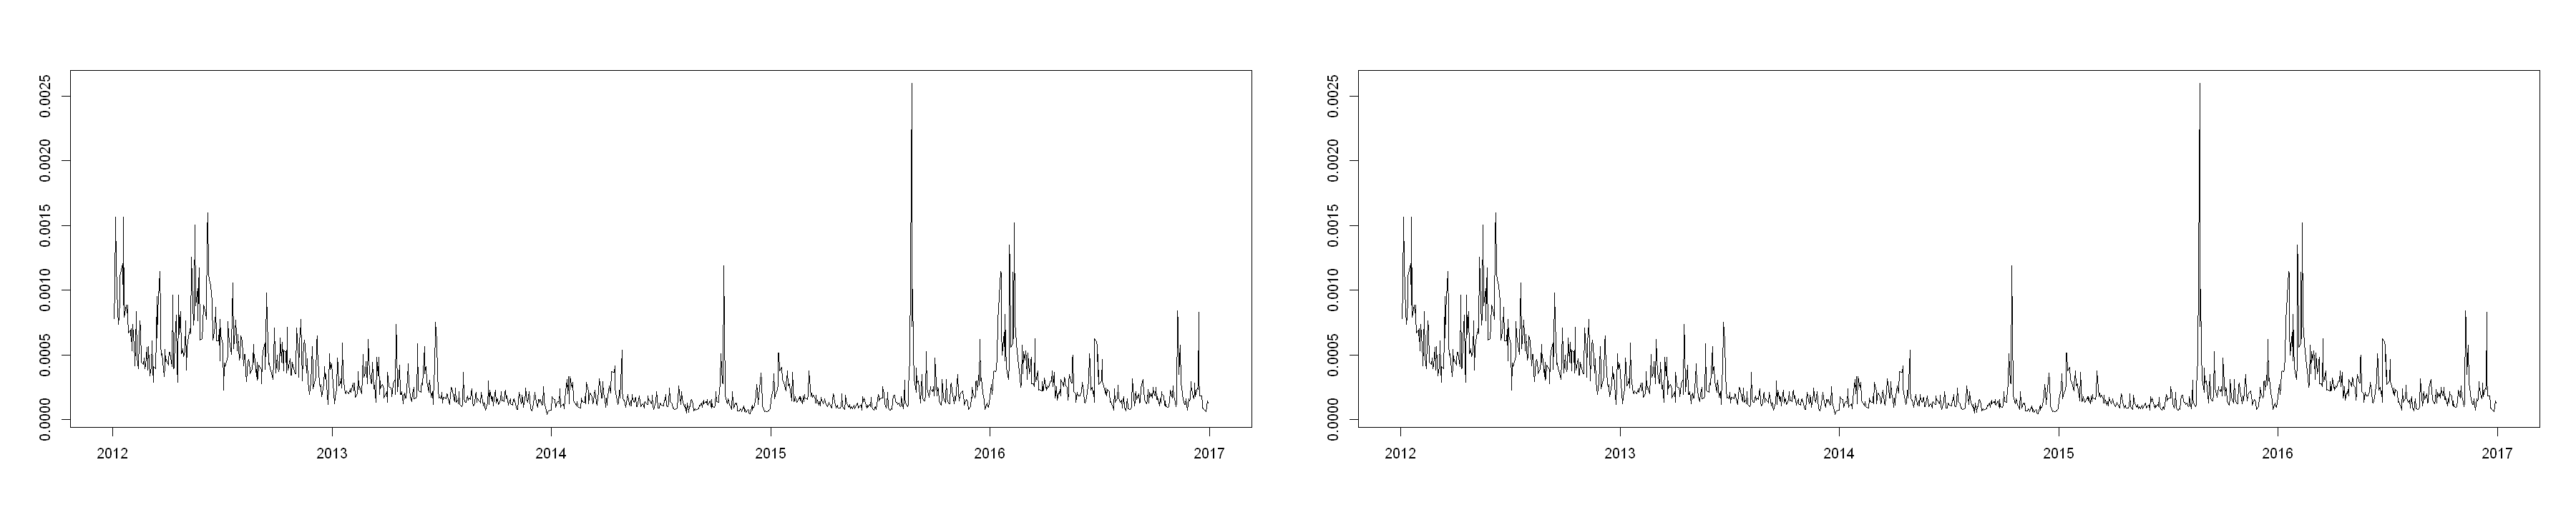

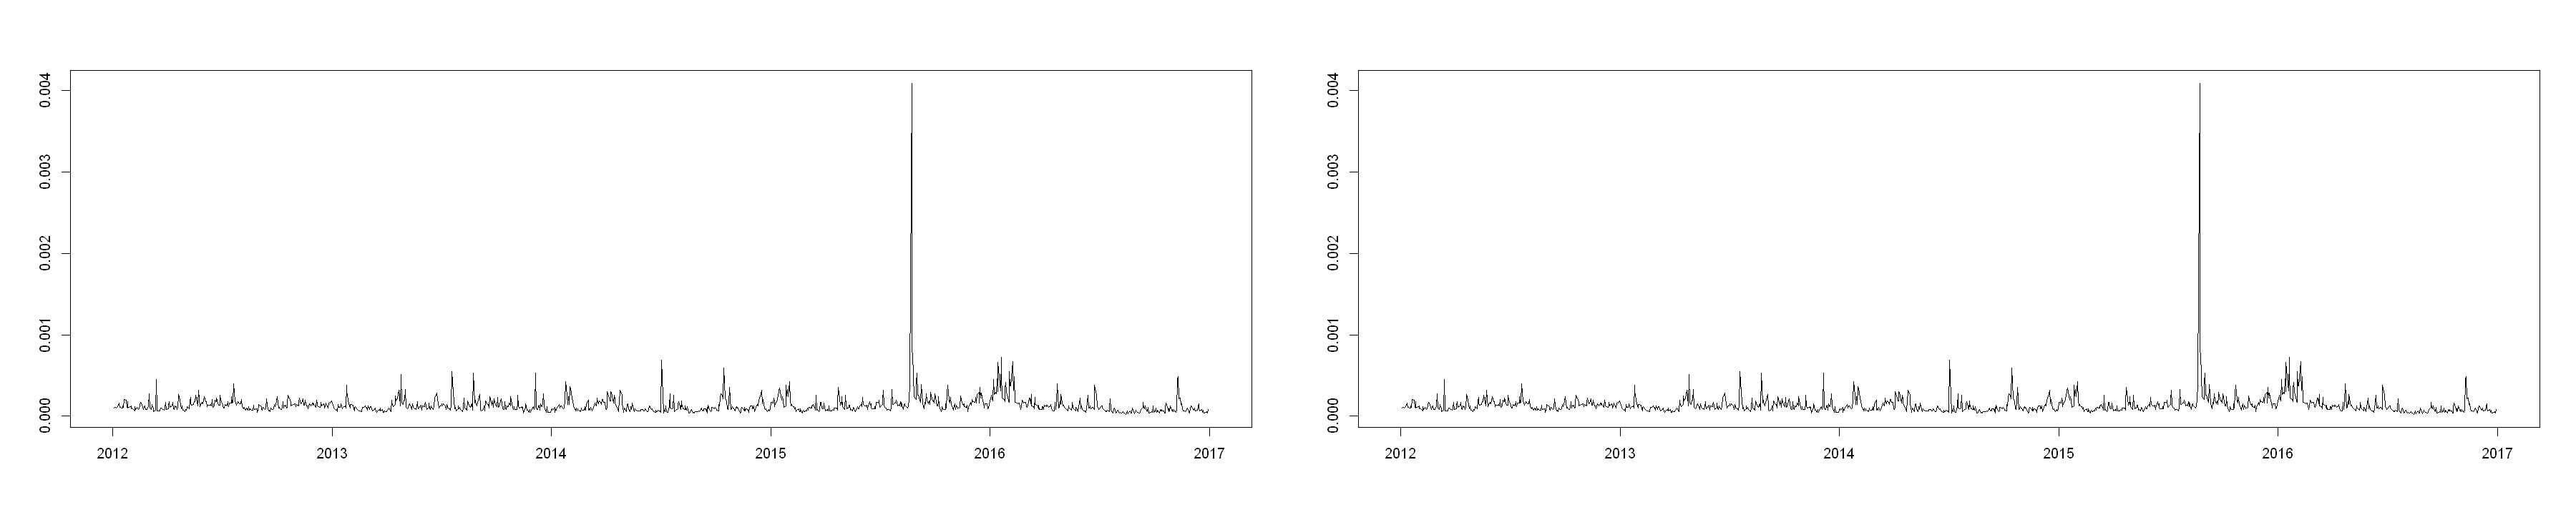

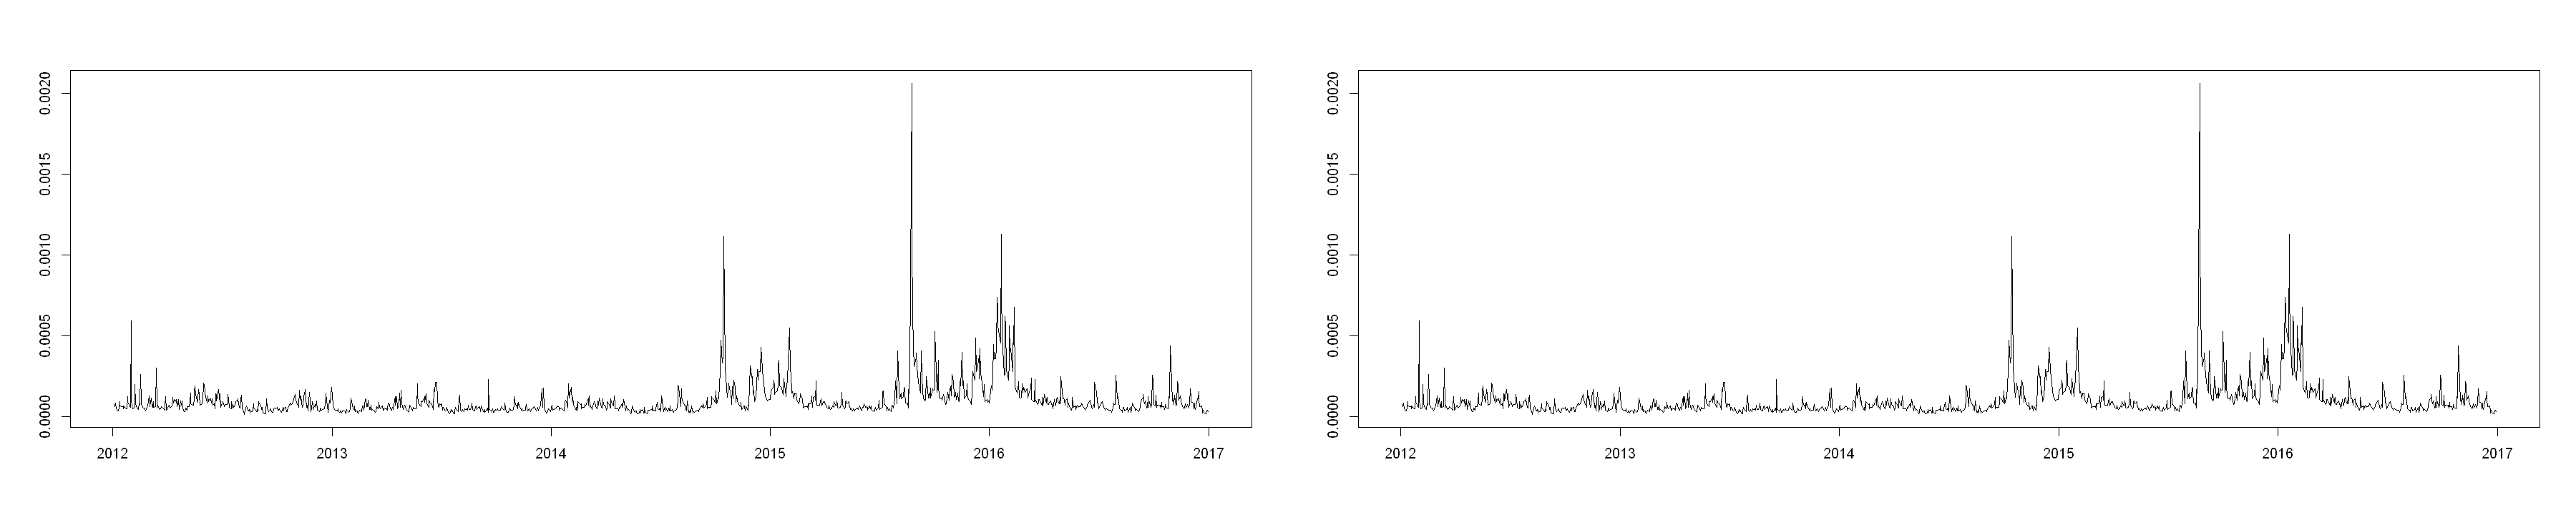

In [131]:
par(mfrow = c(1, 2))
options(repr.plot.width = 30, repr.plot.height = 6)

plot.zoo(RV_ret_BAC,xlab=NA,ylab=NA)
plot.zoo((RV_price_BAC),xlab=NA,ylab=NA)

plot.zoo((RV_ret_MSFT),xlab=NA,ylab=NA)
plot.zoo((RV_price_MSFT),xlab=NA,ylab=NA)

plot.zoo((RV_ret_XOM),xlab=NA,ylab=NA)
plot.zoo((RV_price_XOM),xlab=NA,ylab=NA)

In [132]:
head(RV_ret_BAC)
head(RV_price_BAC)

                   [,1]
2012-01-03 0.0007787649
2012-01-04 0.0010187267
2012-01-05 0.0015620921
2012-01-06 0.0011918156
2012-01-09 0.0008431192
2012-01-10 0.0007357003

                   [,1]
2012-01-03 0.0007787649
2012-01-04 0.0010187267
2012-01-05 0.0015620921
2012-01-06 0.0011918156
2012-01-09 0.0008431192
2012-01-10 0.0007357003

### 5

In [133]:
head(XOM_returns)

Warning message:
"object timezone (UTC) is different from system timezone ()"


                             [,1]
2012-01-03 09:30:00  0.0000000000
2012-01-03 09:31:00  0.0003477074
2012-01-03 09:32:00 -0.0001154081
2012-01-03 09:33:00  0.0003476267
2012-01-03 09:34:00  0.0000000000
2012-01-03 09:35:00  0.0002321646

In [134]:
 BAC_returns_9<-rCov(BAC_returns["T09:30:00/T10:59:00"])
  index(BAC_returns_9)<-as.Date(index(BAC_returns_9))
 BAC_returns_11<-rCov(BAC_returns["T11:00:00/T14:29:00"])
  index(BAC_returns_11)<-as.Date(index(BAC_returns_11))
 BAC_returns_14<-rCov(BAC_returns["T14:30/T16:00"])
  index(BAC_returns_14)<-as.Date(index(BAC_returns_14))

 MSFT_returns_9<-rCov(MSFT_returns["T09:30:00/T10:59:00"])
  index(MSFT_returns_9)<-as.Date(index(MSFT_returns_9))
 MSFT_returns_11<-rCov(MSFT_returns["T11:00:00/T14:29:00"])
  index(MSFT_returns_11)<-as.Date(index(MSFT_returns_11))
 MSFT_returns_14<-rCov(MSFT_returns["T14:30/T16:00"])
  index(MSFT_returns_14)<-as.Date(index(MSFT_returns_14))

 XOM_returns_9<-rCov(XOM_returns["T09:30:00/T10:59:00"])
  index(XOM_returns_9)<-as.Date(index(XOM_returns_9))
 XOM_returns_11<-rCov(XOM_returns["T11:00:00/T14:29:00"])
  index(XOM_returns_11)<-as.Date(index(XOM_returns_11))
 XOM_returns_14<-rCov(XOM_returns["T14:30/T16:00"])
  index(XOM_returns_14)<-as.Date(index(XOM_returns_14))

In [135]:
head(BAC_returns_14)
str(BAC_returns_14)

                   [,1]
2012-01-03 0.0001874788
2012-01-04 0.0001968047
2012-01-05 0.0003918935
2012-01-06 0.0001993335
2012-01-09 0.0001676551
2012-01-10 0.0001684666

An xts object on 2012-01-03 / 2016-12-30 containing: 
  Data:    double [1258, 1]
  Index:   Date [1258] (TZ: "UTC")


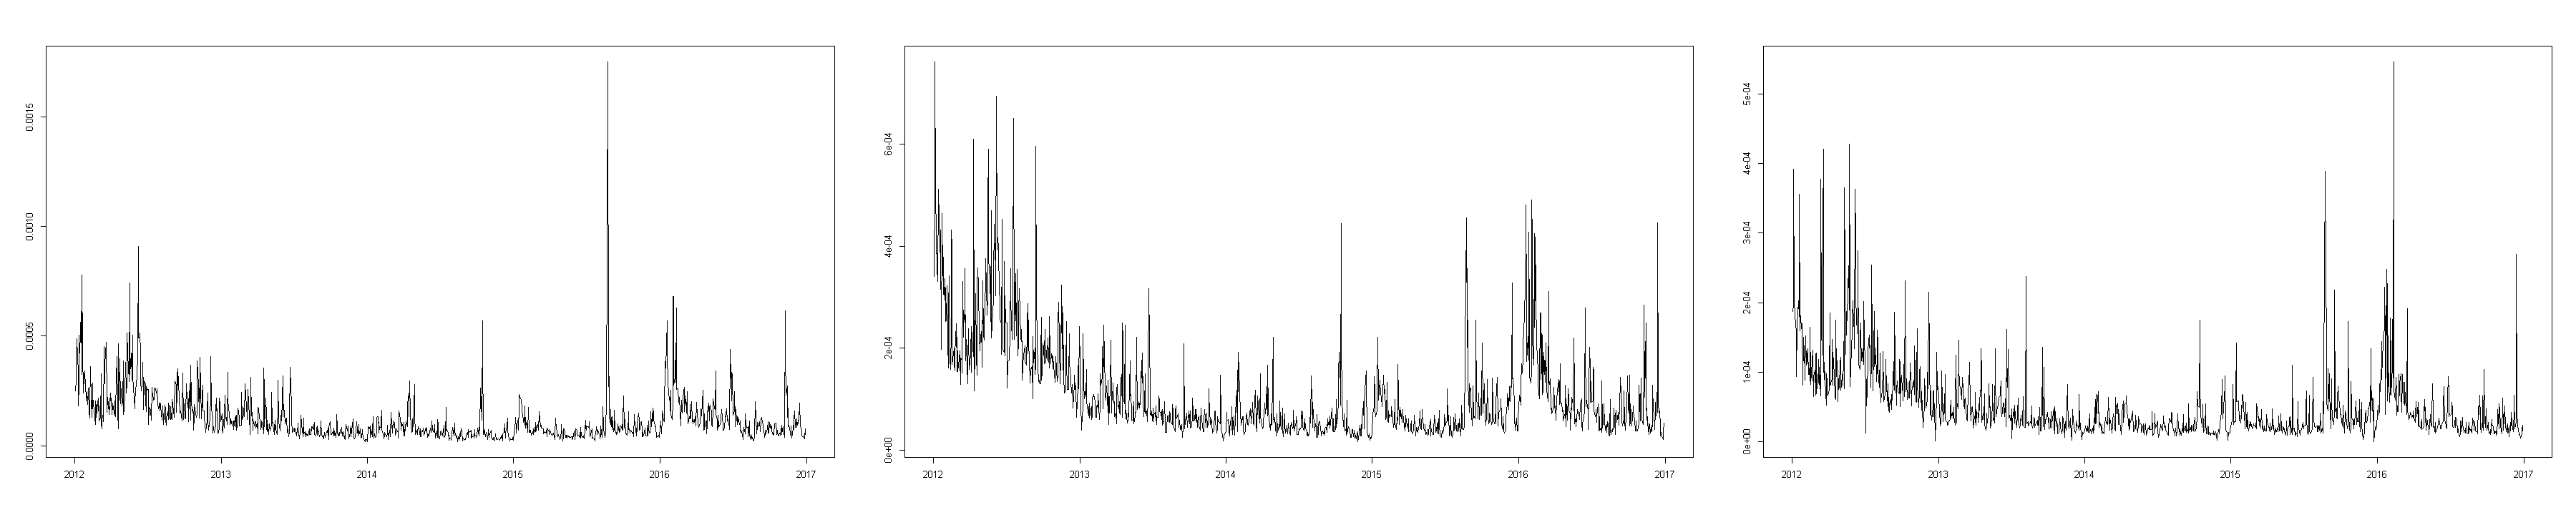

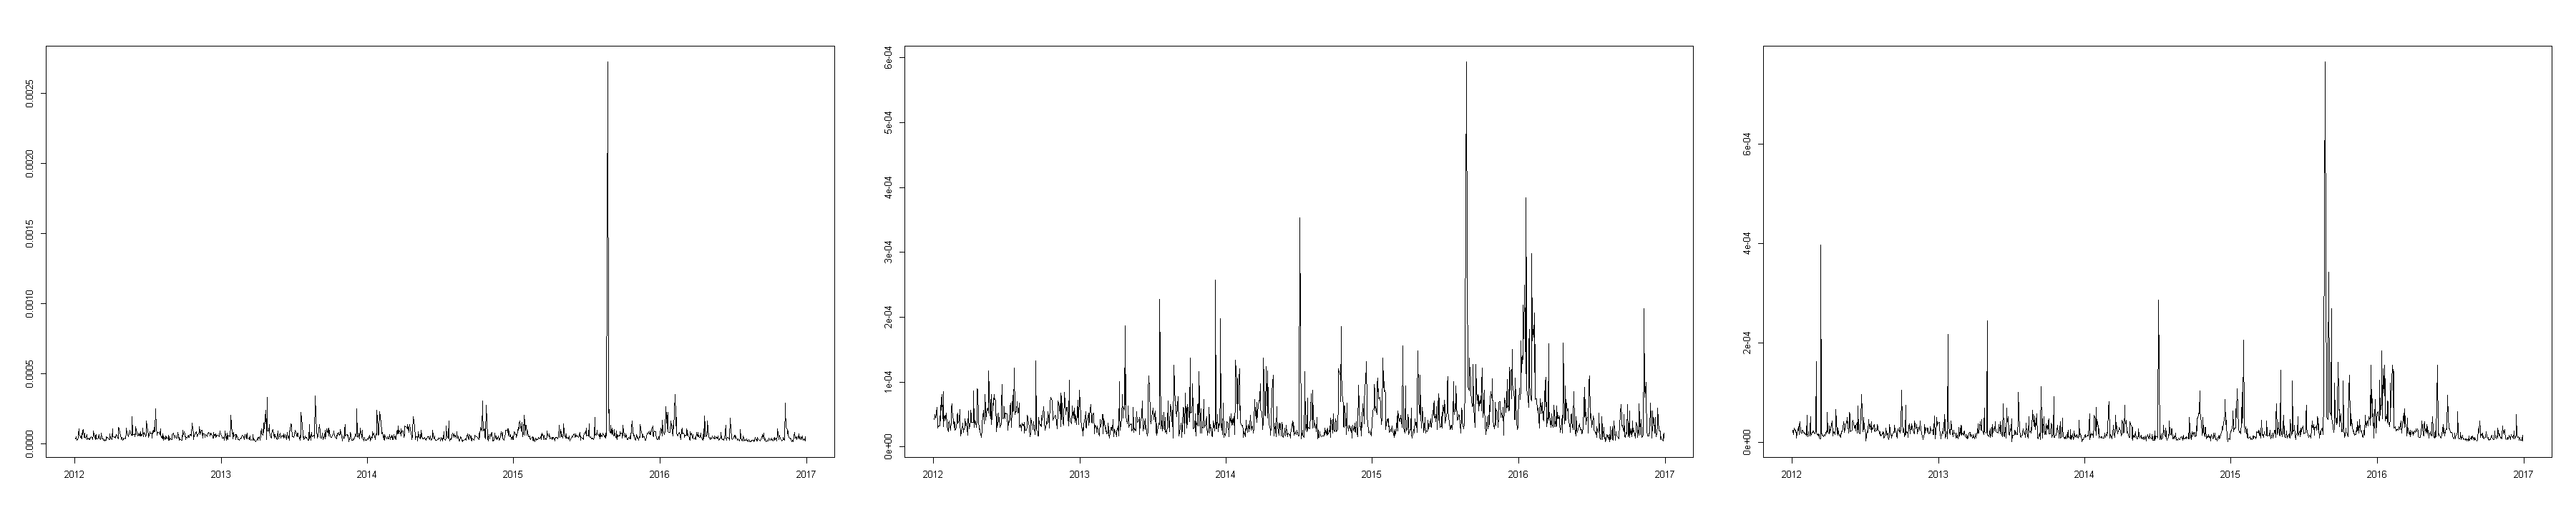

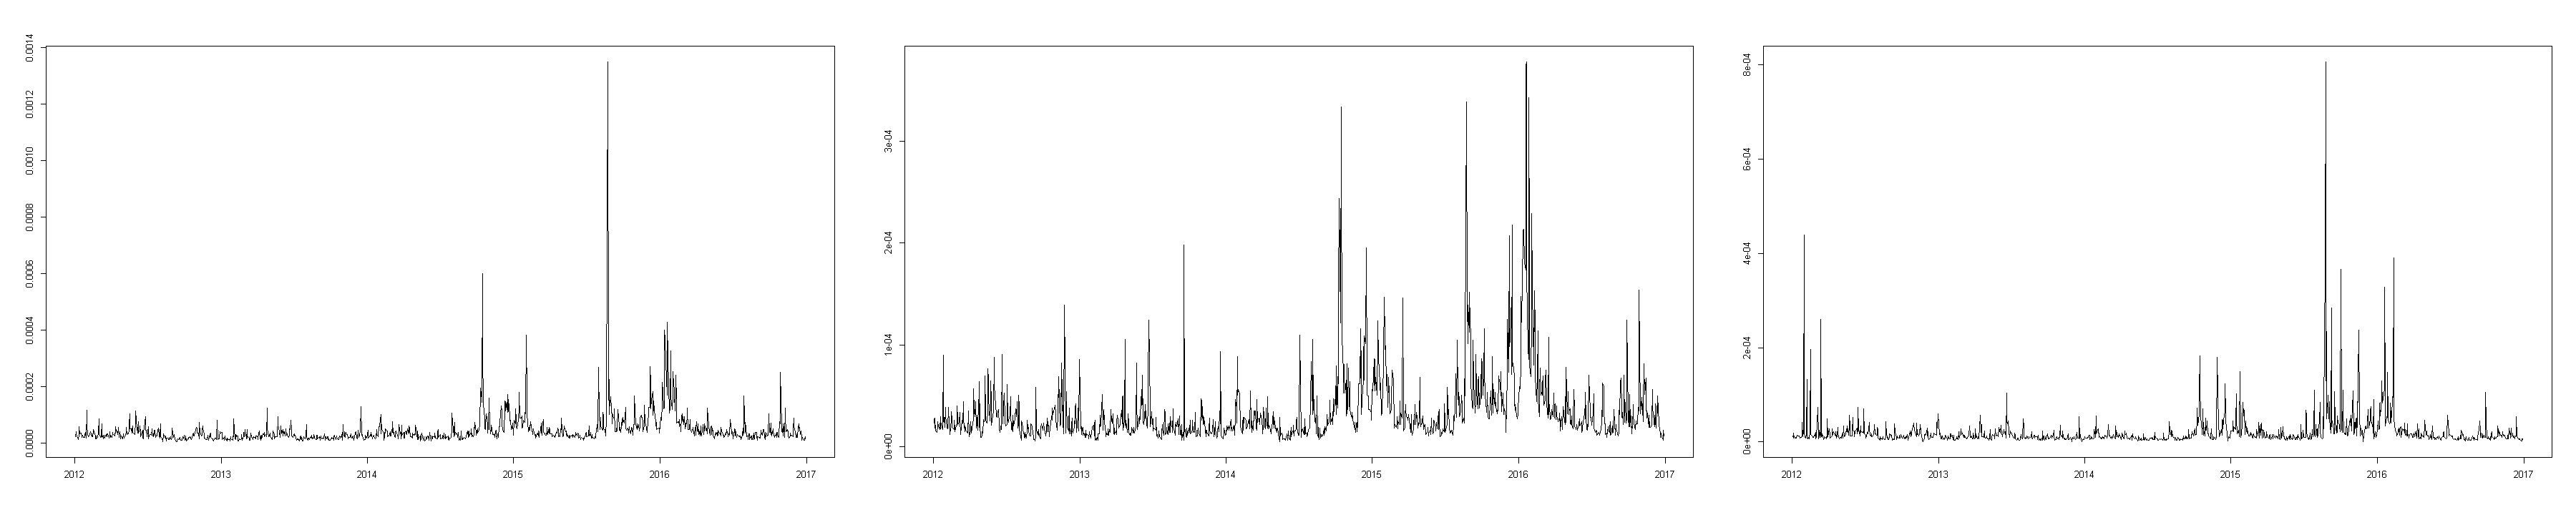

In [137]:
par(mfrow = c(1, 3))
options(repr.plot.width = 30, repr.plot.height = 6)

plot.zoo(BAC_returns_9,xlab=NA,ylab=NA)
plot.zoo(BAC_returns_11,xlab=NA,ylab=NA)
plot.zoo(BAC_returns_14,xlab=NA,ylab=NA)

plot.zoo(MSFT_returns_9,xlab=NA,ylab=NA)
plot.zoo(MSFT_returns_11,xlab=NA,ylab=NA)
plot.zoo(MSFT_returns_14,xlab=NA,ylab=NA)

plot.zoo(XOM_returns_9,xlab=NA,ylab=NA)
plot.zoo(XOM_returns_11,xlab=NA,ylab=NA)
plot.zoo(XOM_returns_14,xlab=NA,ylab=NA)

### 6

In [138]:
RV_intra_BAC <-BAC_returns_14 + BAC_returns_11 + BAC_returns_9

RV_intra_MSFT <-MSFT_returns_14 + MSFT_returns_11 + MSFT_returns_9

RV_intra_XOM <-XOM_returns_14 + XOM_returns_11 + XOM_returns_9

In [139]:
head(RV_intra_XOM)

                     e1
2012-01-03 6.315347e-05
2012-01-04 6.659626e-05
2012-01-05 8.473441e-05
2012-01-06 4.987180e-05
2012-01-09 3.610025e-05
2012-01-10 3.850767e-05

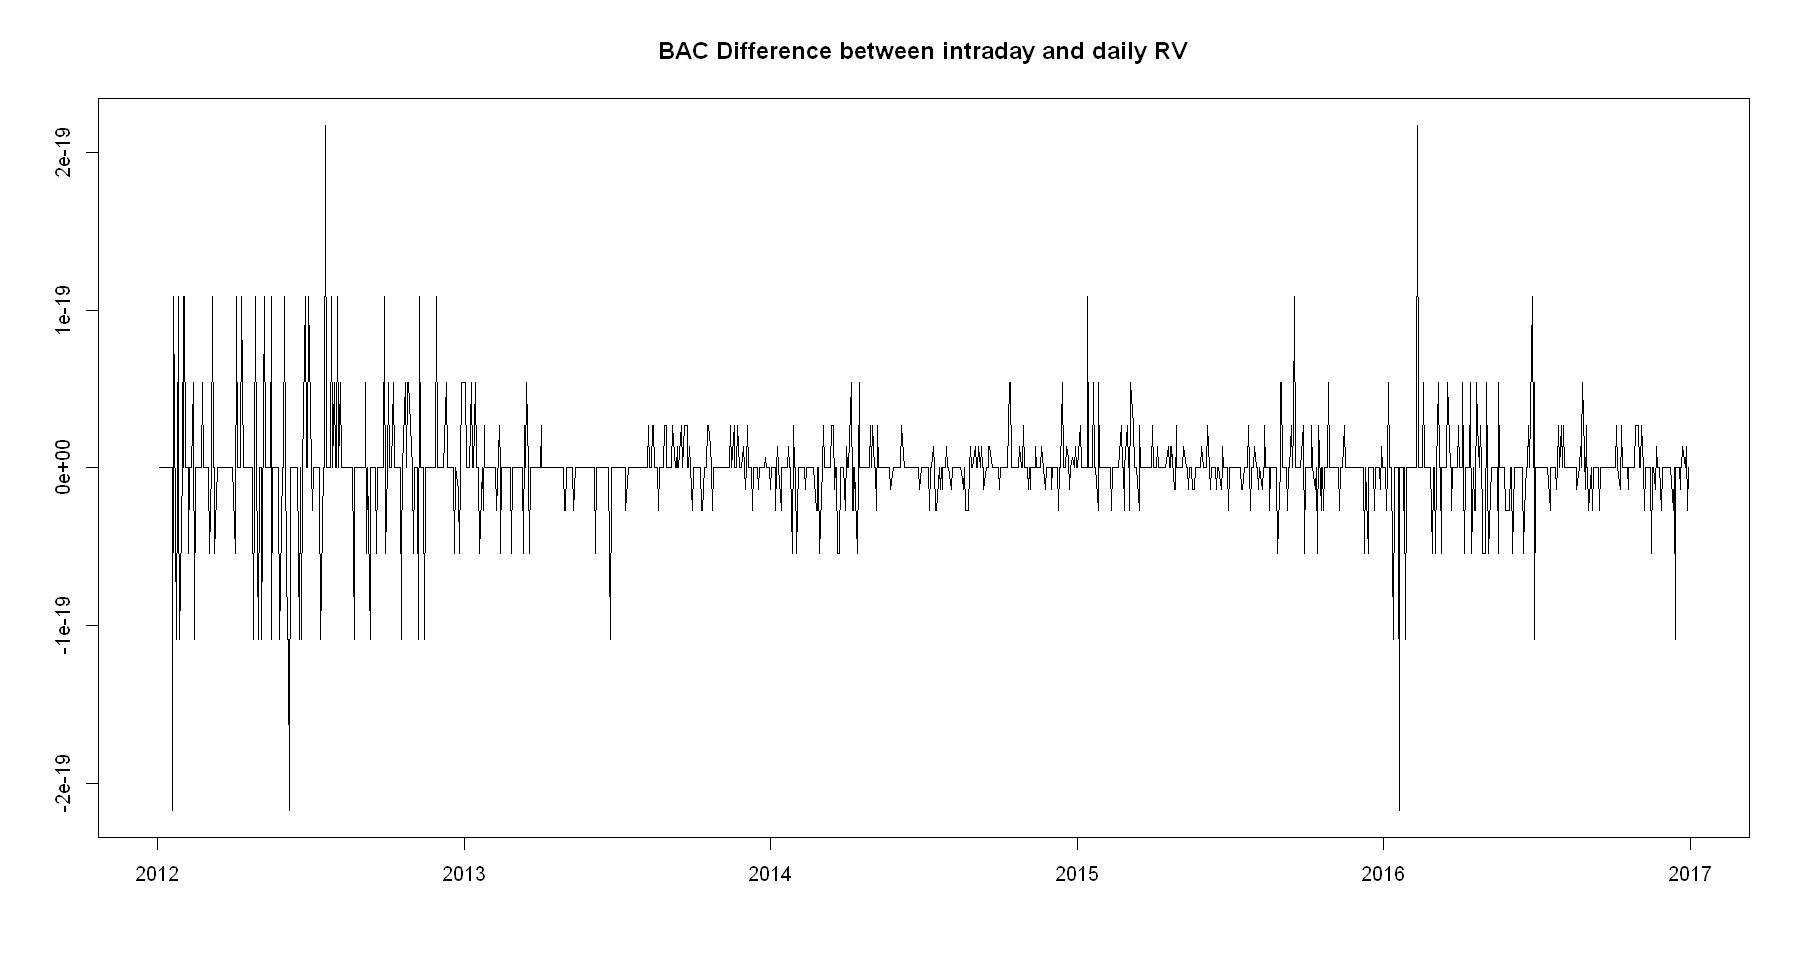

Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


ERROR: Error in plot.window(...): need finite 'xlim' values


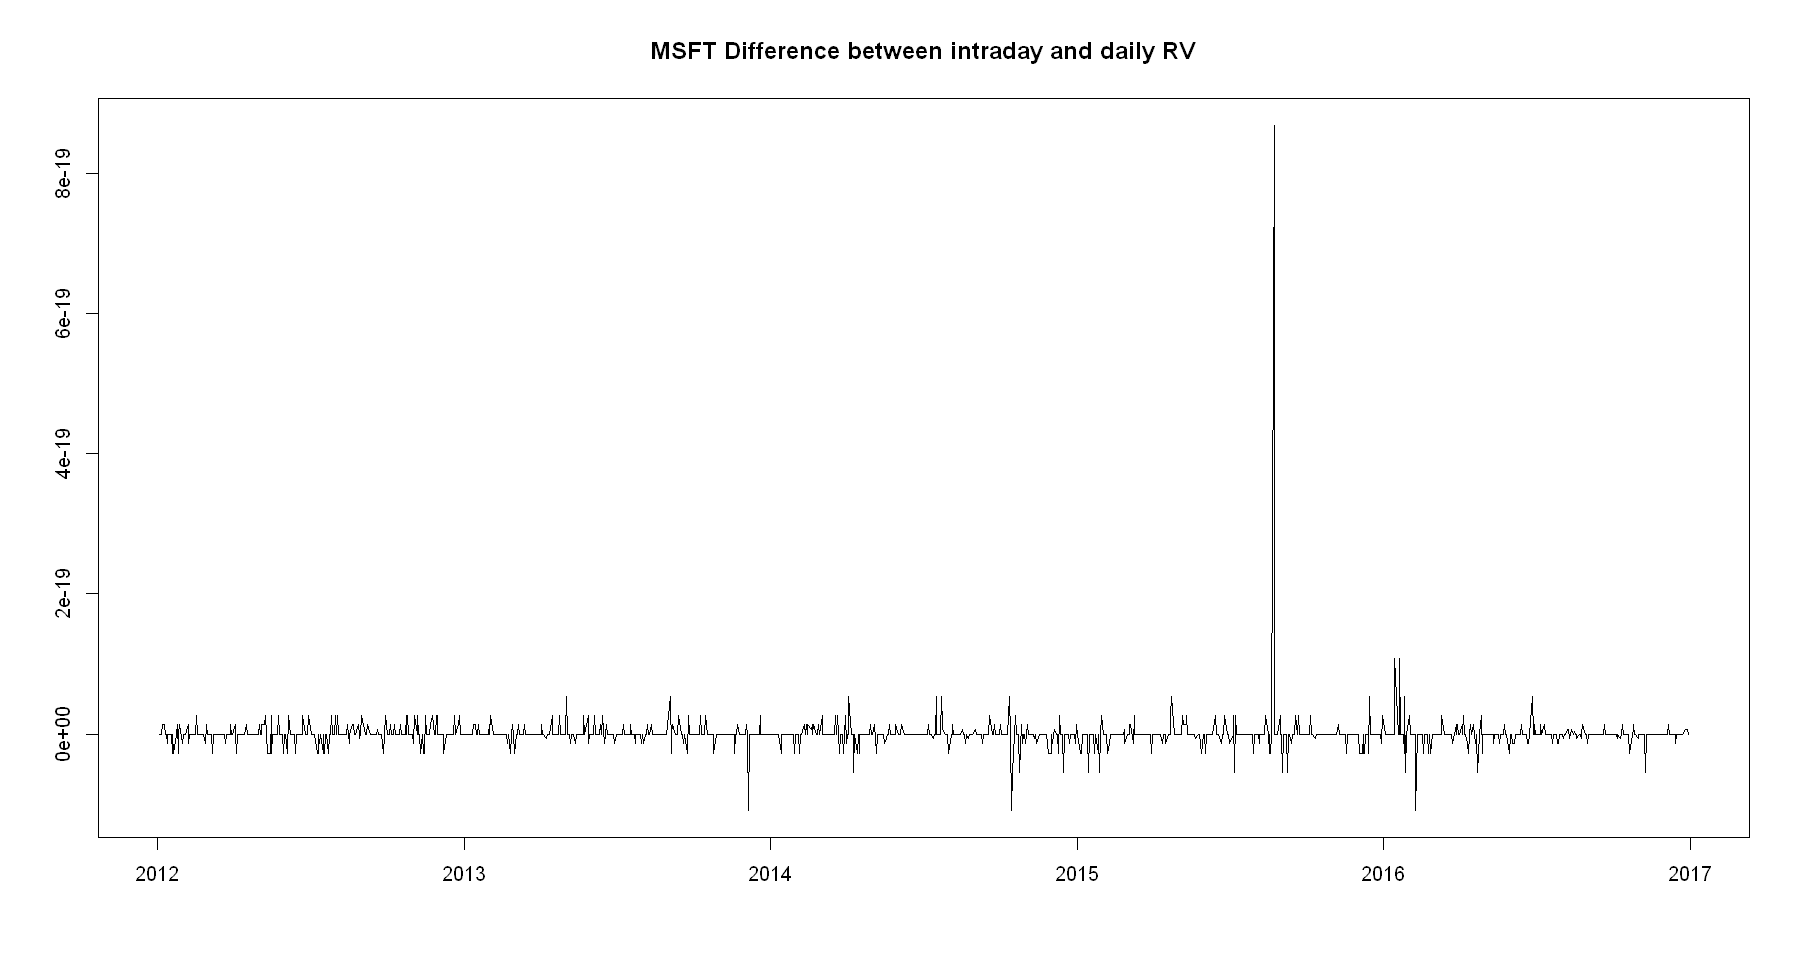

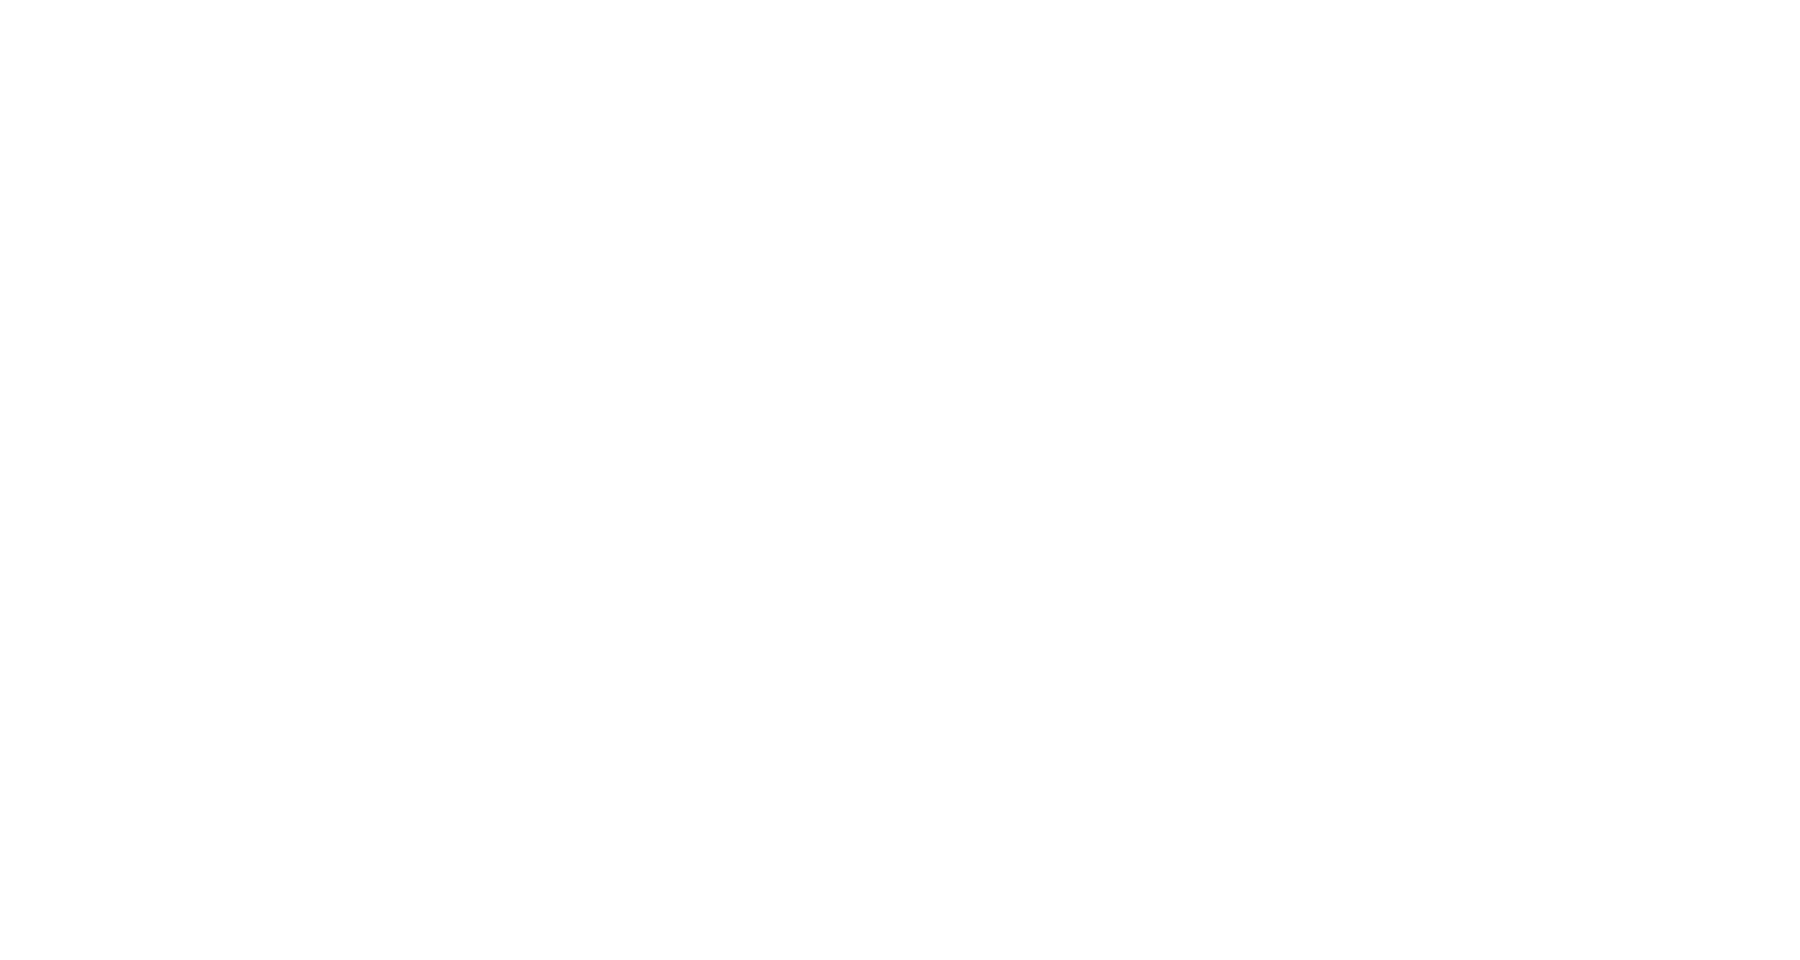

In [140]:
options(repr.plot.width =15, repr.plot.height = 8)

plot.zoo(RV_ret_BAC - RV_intra_BAC,xlab = NA, ylab=NA, main ="BAC Difference between intraday and daily RV")
plot.zoo(RV_ret_MSFT - RV_intra_MSFT,xlab = NA, ylab=NA, main ="MSFT Difference between intraday and daily RV")
plot.zoo(RV_ret_XOM - RV_intra_XOM,xlab = NA, ylab=NA, main ="XOM Difference between intraday and daily RV")

The differences might be caused by the fact that intraday prices catches more volatility than daily prices. 
Another source of differences might be trading of the stock on different stock exchanges that are opened in different time.

### 7

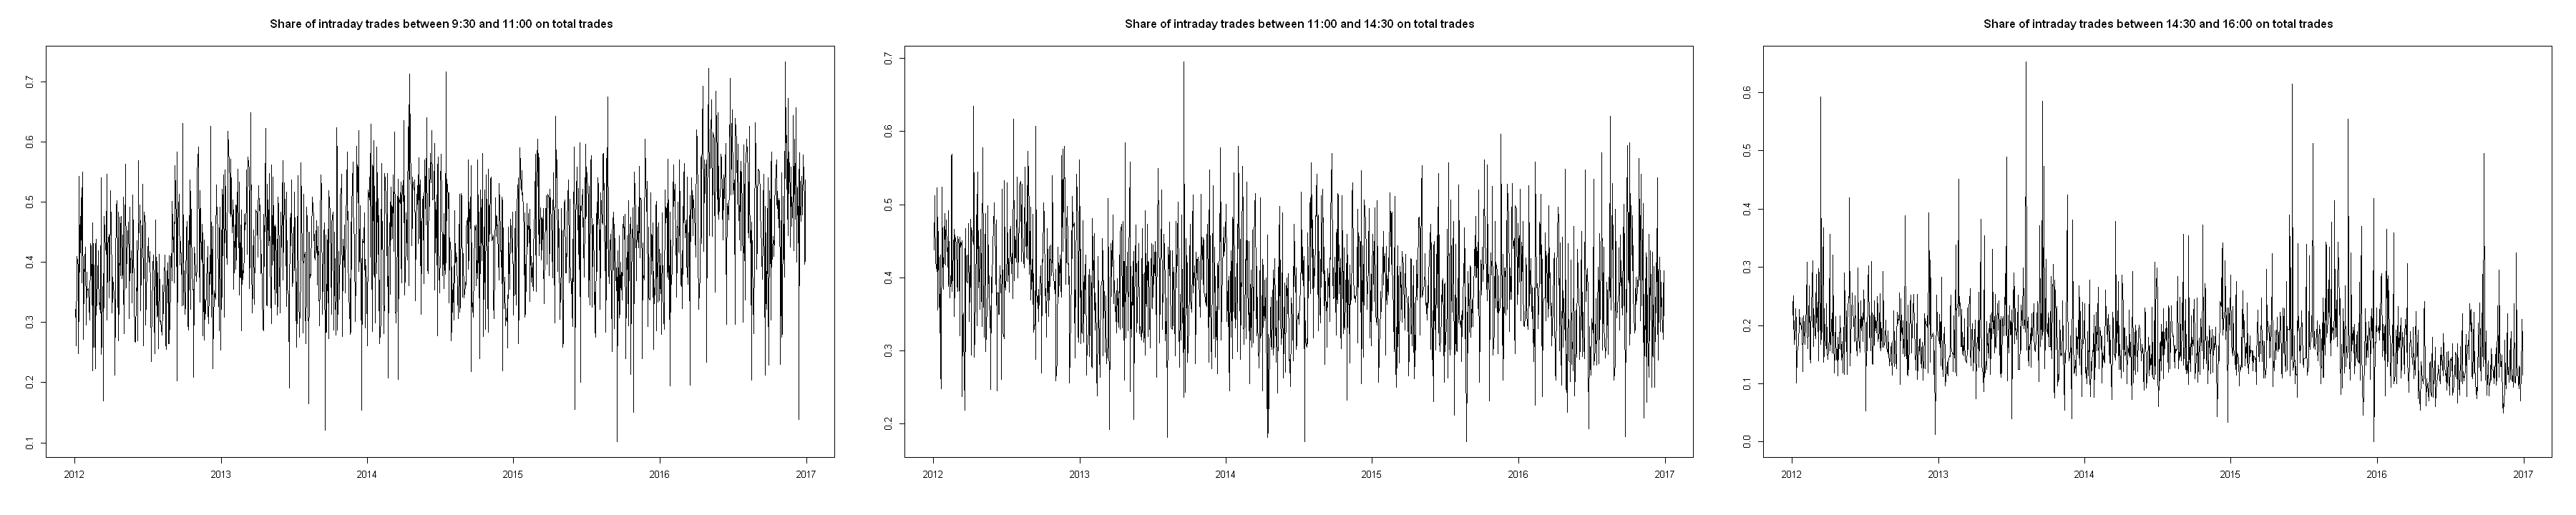

Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


ERROR: Error in plot.window(...): need finite 'xlim' values


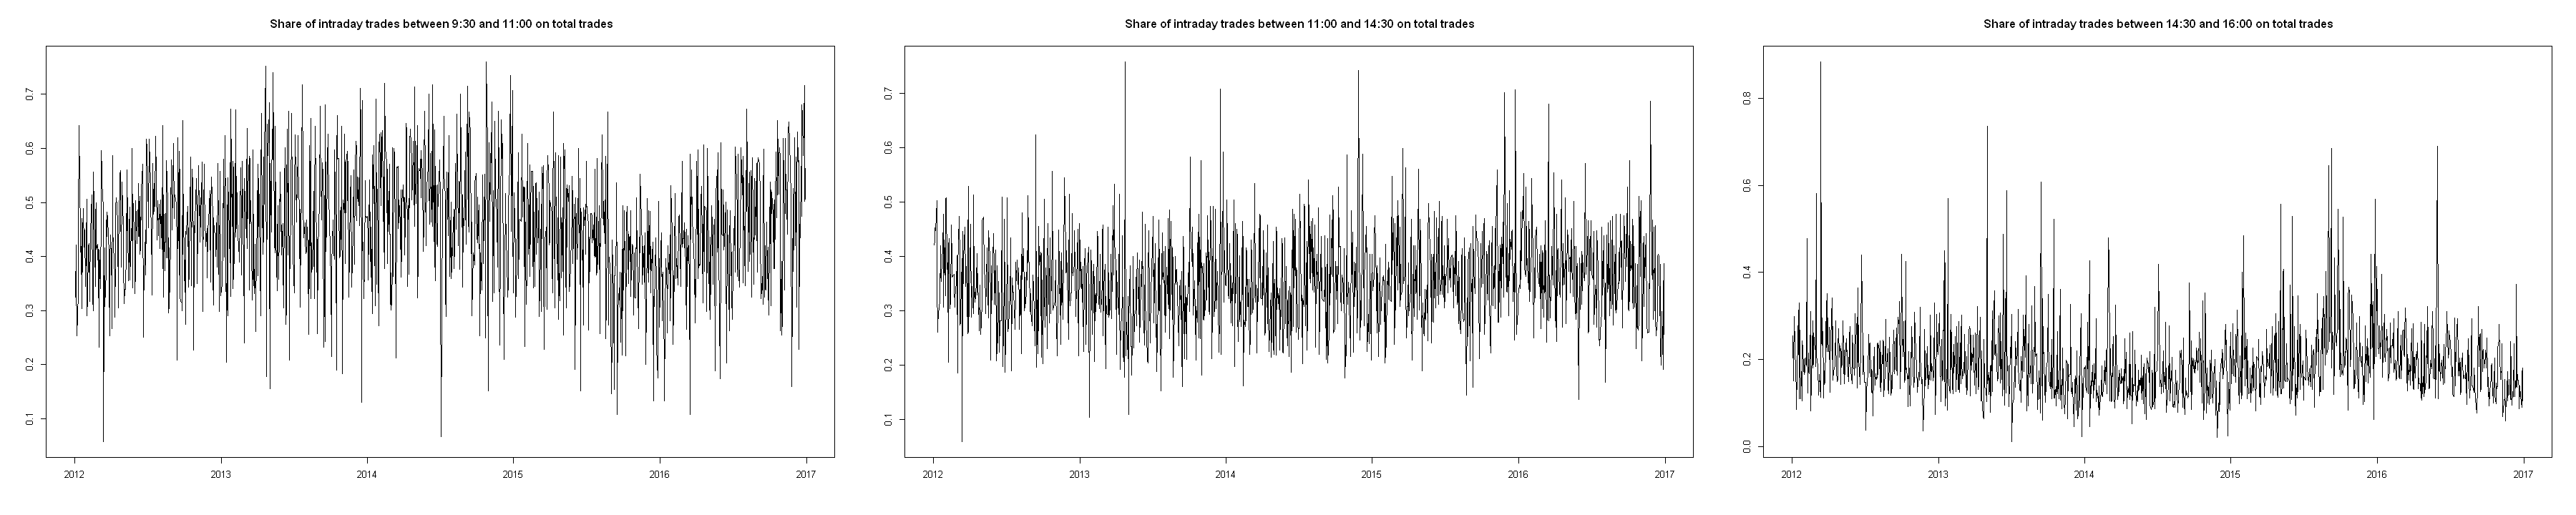

In [141]:
par(mfrow = c(1, 3))
options(repr.plot.width = 30, repr.plot.height = 6)

share_BAC_9 <- BAC_returns_9/RV_ret_BAC
plot.zoo(share_BAC_9,xlab = NA, ylab=NA, main =" Share of intraday trades between 9:30 and 11:00 on total trades")
share_BAC_11 <- BAC_returns_11/RV_ret_BAC
plot.zoo(share_BAC_11,xlab = NA, ylab=NA, main =" Share of intraday trades between 11:00 and 14:30 on total trades")
share_BAC_14 <- BAC_returns_14/RV_ret_BAC
plot.zoo(share_BAC_14,xlab = NA, ylab=NA, main =" Share of intraday trades between 14:30 and 16:00 on total trades")

share_MSFT_9 <- MSFT_returns_9/RV_ret_MSFT
plot.zoo(share_MSFT_9,xlab = NA, ylab=NA, main =" Share of intraday trades between 9:30 and 11:00 on total trades")
share_MSFT_11 <- MSFT_returns_11/RV_ret_MSFT
plot.zoo(share_MSFT_11,xlab = NA, ylab=NA, main =" Share of intraday trades between 11:00 and 14:30 on total trades")
share_MSFT_14 <- MSFT_returns_14/RV_ret_MSFT
plot.zoo(share_MSFT_14,xlab = NA, ylab=NA, main =" Share of intraday trades between 14:30 and 16:00 on total trades")

share_XOM_9 <- XOM_returns_9/RV_ret_XOM
plot.zoo(share_XOM_9,xlab = NA, ylab=NA, main =" Share of intraday trades between 9:30 and 11:00 on total trades")
share_XOM_11 <- XOM_returns_11/RV_ret_XOM
plot.zoo(share_XOM_11,xlab = NA, ylab=NA, main =" Share of intraday trades between 11:00 and 14:30 on total trades")
share_XOM_14 <- XOM_returns_14/RV_ret_XOM
plot.zoo(share_XOM_14,xlab = NA, ylab=NA, main =" Share of intraday trades between 14:30 and 16:00 on total trades")

Clearly it depends on the trading hours. The largest share is seen in the morning hours while the lowest in the late afternoon.

### 8

Names in code are not changed, however we use the price data as it can be ween from cell below.

In [142]:
BAC_returns_9<-rCov(BAC["T09:30:00/T10:59:00"],makeReturns = TRUE)
  index(BAC_returns_9)<-as.Date(index(BAC_returns_9))
 BAC_returns_11<-rCov(BAC["T11:00:00/T14:29:00"],makeReturns = TRUE)
  index(BAC_returns_11)<-as.Date(index(BAC_returns_11))
 BAC_returns_14<-rCov(BAC["T14:30/T16:00"],makeReturns = TRUE)
  index(BAC_returns_14)<-as.Date(index(BAC_returns_14))

 XOM_returns_9<-rCov(XOM["T09:30:00/T10:59:00"],makeReturns = TRUE)
  index(XOM_returns_9)<-as.Date(index(XOM_returns_9))
 XOM_returns_11<-rCov(XOM["T11:00:00/T14:29:00"],makeReturns = TRUE)
  index(XOM_returns_11)<-as.Date(index(XOM_returns_11))
 XOM_returns_14<-rCov(XOM["T14:30/T16:00"],makeReturns = TRUE)
  index(XOM_returns_14)<-as.Date(index(XOM_returns_14))

In [143]:
MSFT_returns_9<-rCov(MSFT["T09:30:00/T10:59:00"],makeReturns = TRUE)
  index(MSFT_returns_9)<-as.Date(index(MSFT_returns_9))
MSFT_returns_11<-rCov(MSFT["T11:00:00/T14:29:00"],makeReturns = TRUE)
  index(MSFT_returns_11)<-as.Date(index(MSFT_returns_11))
 MSFT_returns_14<-rCov(MSFT["T14:30/T16:00"],makeReturns = TRUE)
  index(MSFT_returns_14)<-as.Date(index(MSFT_returns_14))

ERROR: Error in x[(2:l), ]: subscript out of bounds


In [144]:
head(MSFT["T14:30/T16:00"])

Warning message:
"object timezone (UTC) is different from system timezone ()"


                       [,1]
2012-01-03 14:30:00 22.6051
2012-01-03 14:31:00 22.5967
2012-01-03 14:32:00 22.6135
2012-01-03 14:33:00 22.6135
2012-01-03 14:34:00 22.6219
2012-01-03 14:35:00 22.6219

In [145]:
head(BAC_returns_14)
str(BAC_returns_14)

                   [,1]
2012-01-03 0.0001874788
2012-01-04 0.0001939001
2012-01-05 0.0003893658
2012-01-06 0.0001993335
2012-01-09 0.0001650974
2012-01-10 0.0001662134

An xts object on 2012-01-03 / 2016-12-30 containing: 
  Data:    double [1258, 1]
  Index:   Date [1258] (TZ: "UTC")


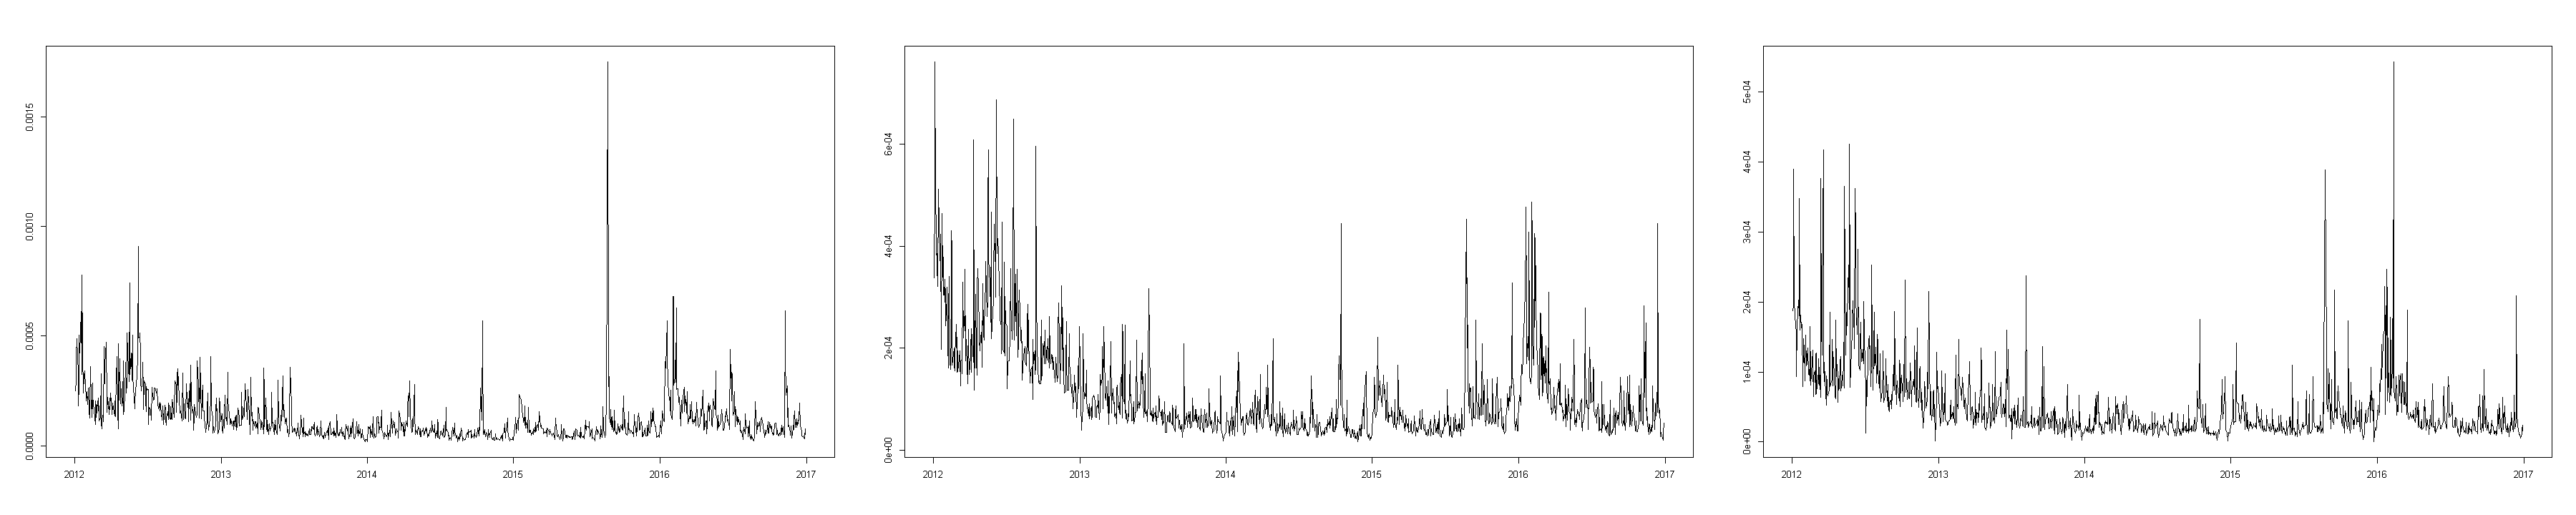

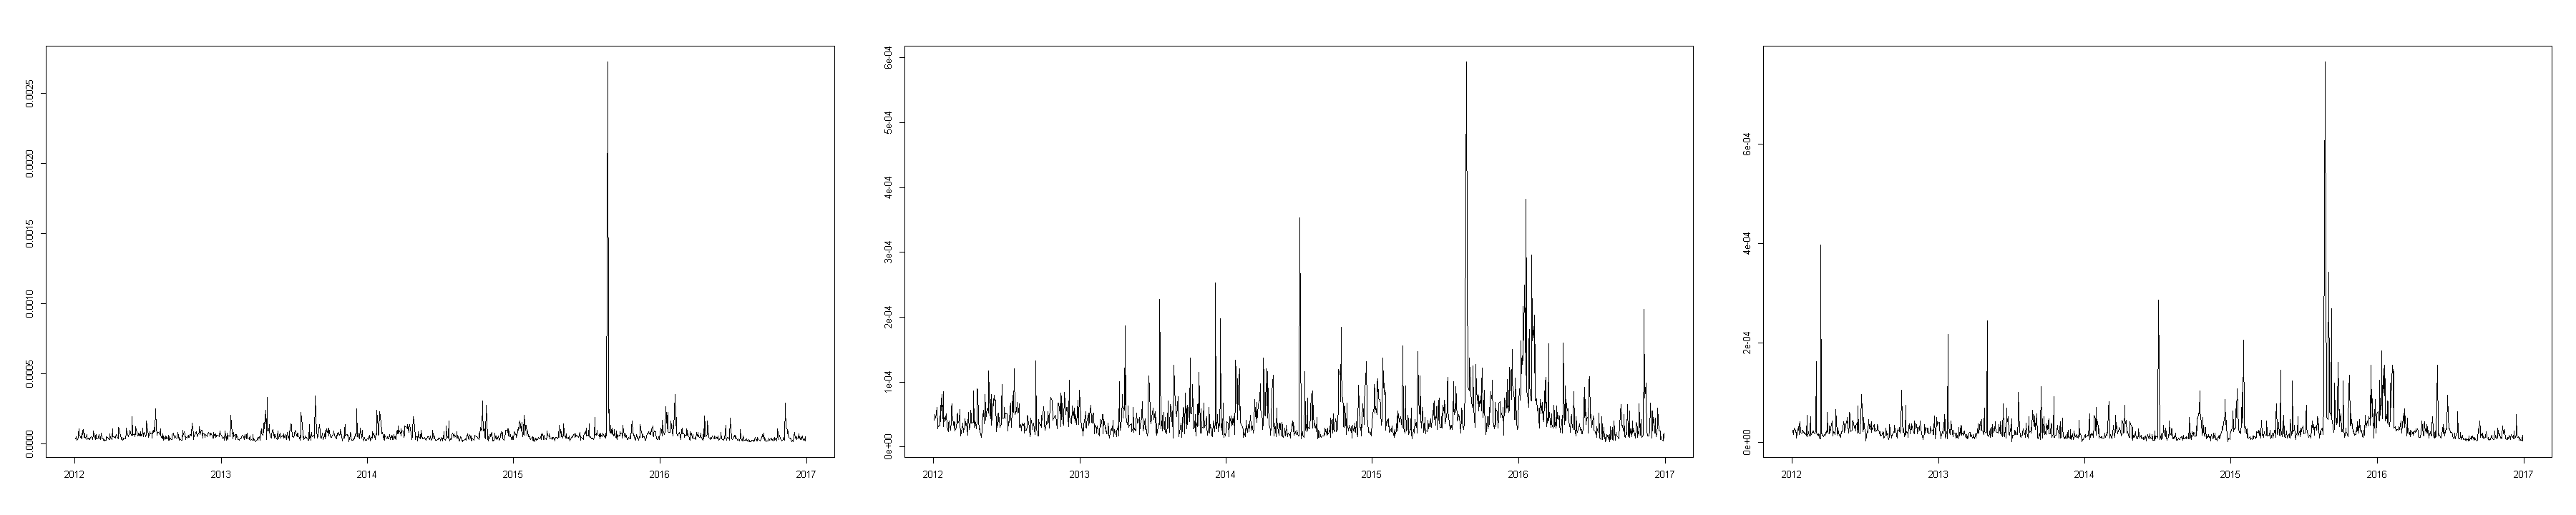

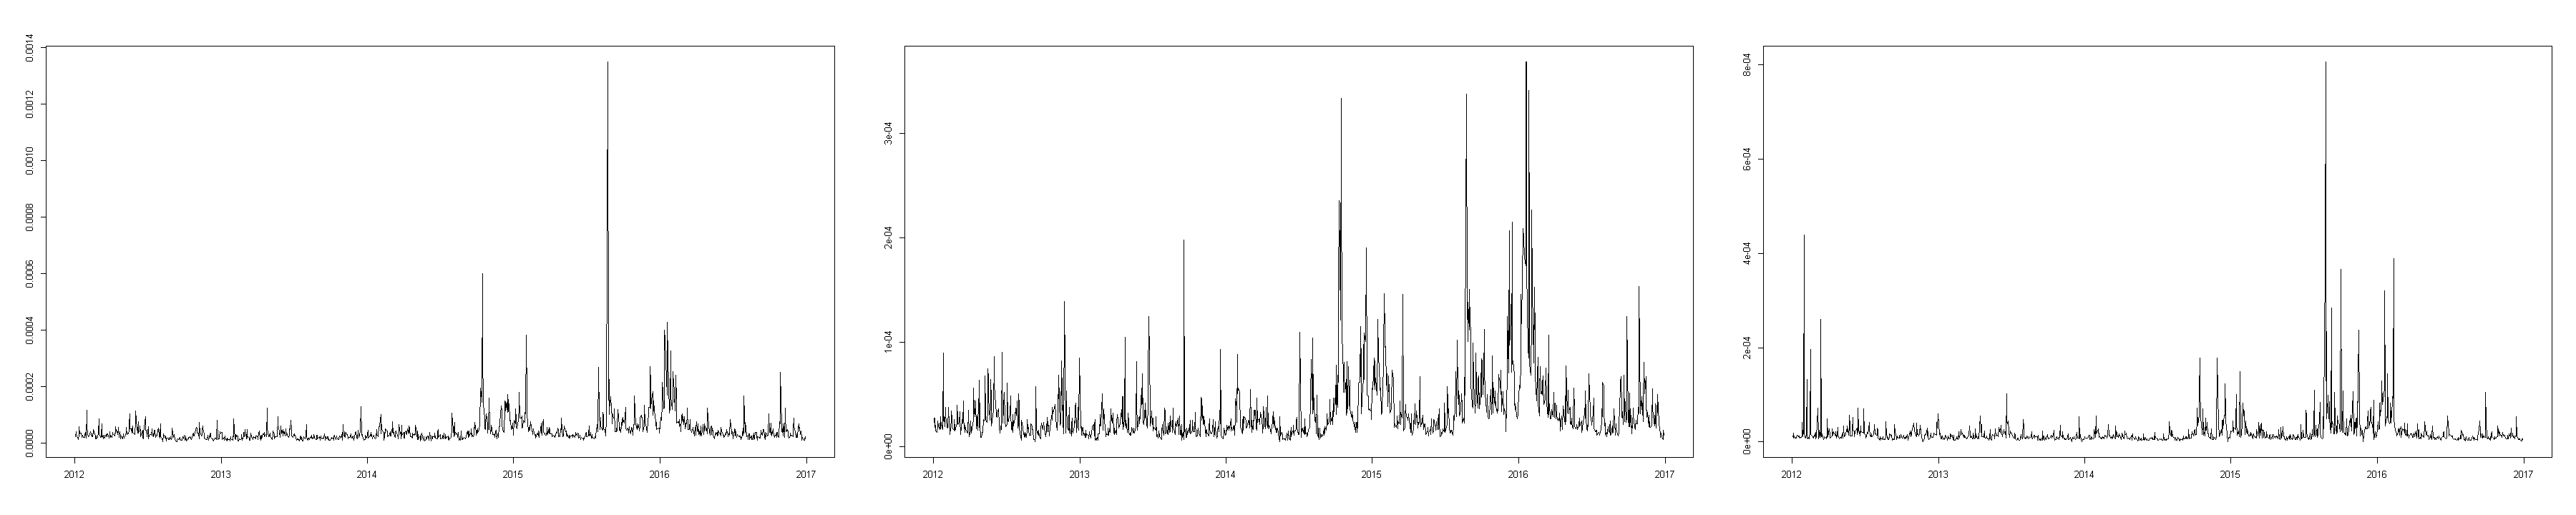

In [146]:
par(mfrow = c(1, 3))
options(repr.plot.width = 30, repr.plot.height = 6)

plot.zoo(BAC_returns_9,xlab=NA,ylab=NA)
plot.zoo(BAC_returns_11,xlab=NA,ylab=NA)
plot.zoo(BAC_returns_14,xlab=NA,ylab=NA)

plot.zoo(MSFT_returns_9,xlab=NA,ylab=NA)
plot.zoo(MSFT_returns_11,xlab=NA,ylab=NA)
plot.zoo(MSFT_returns_14,xlab=NA,ylab=NA)

plot.zoo(XOM_returns_9,xlab=NA,ylab=NA)
plot.zoo(XOM_returns_11,xlab=NA,ylab=NA)
plot.zoo(XOM_returns_14,xlab=NA,ylab=NA)

In [147]:
RV_intra_BAC <-BAC_returns_14 + BAC_returns_11 + BAC_returns_9

RV_intra_MSFT <-MSFT_returns_14 + MSFT_returns_11 + MSFT_returns_9

RV_intra_XOM <-XOM_returns_14 + XOM_returns_11 + XOM_returns_9

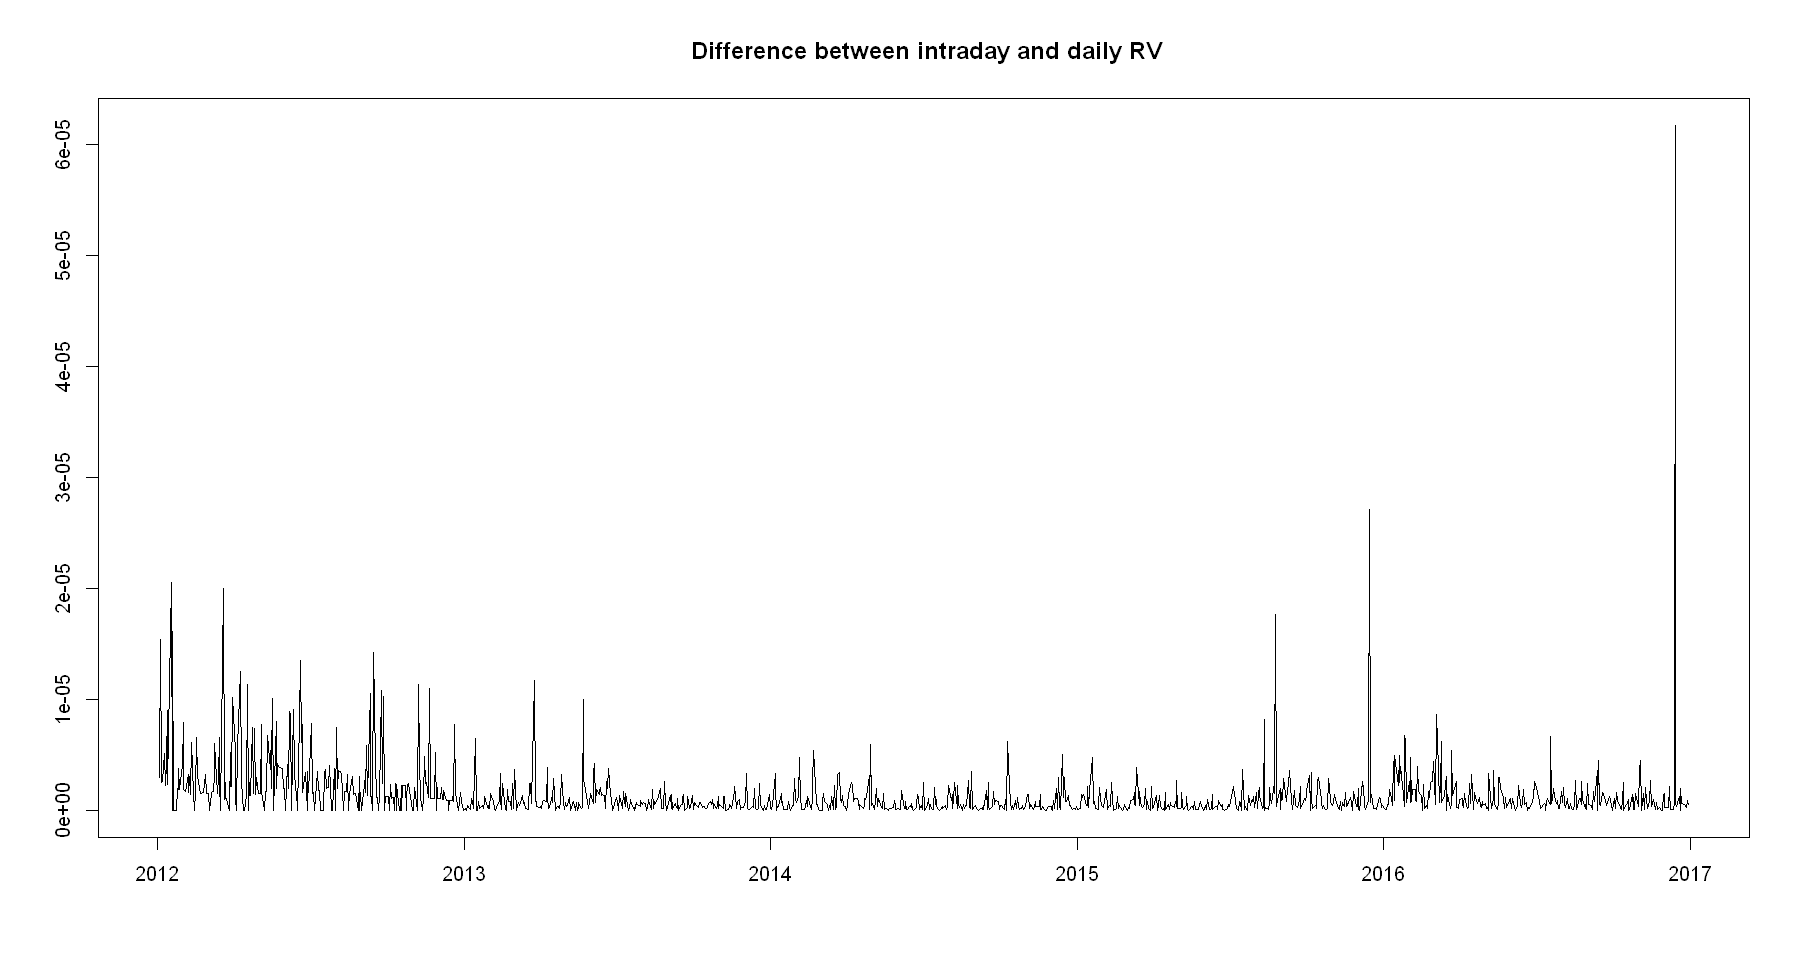

Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


ERROR: Error in plot.window(...): need finite 'xlim' values


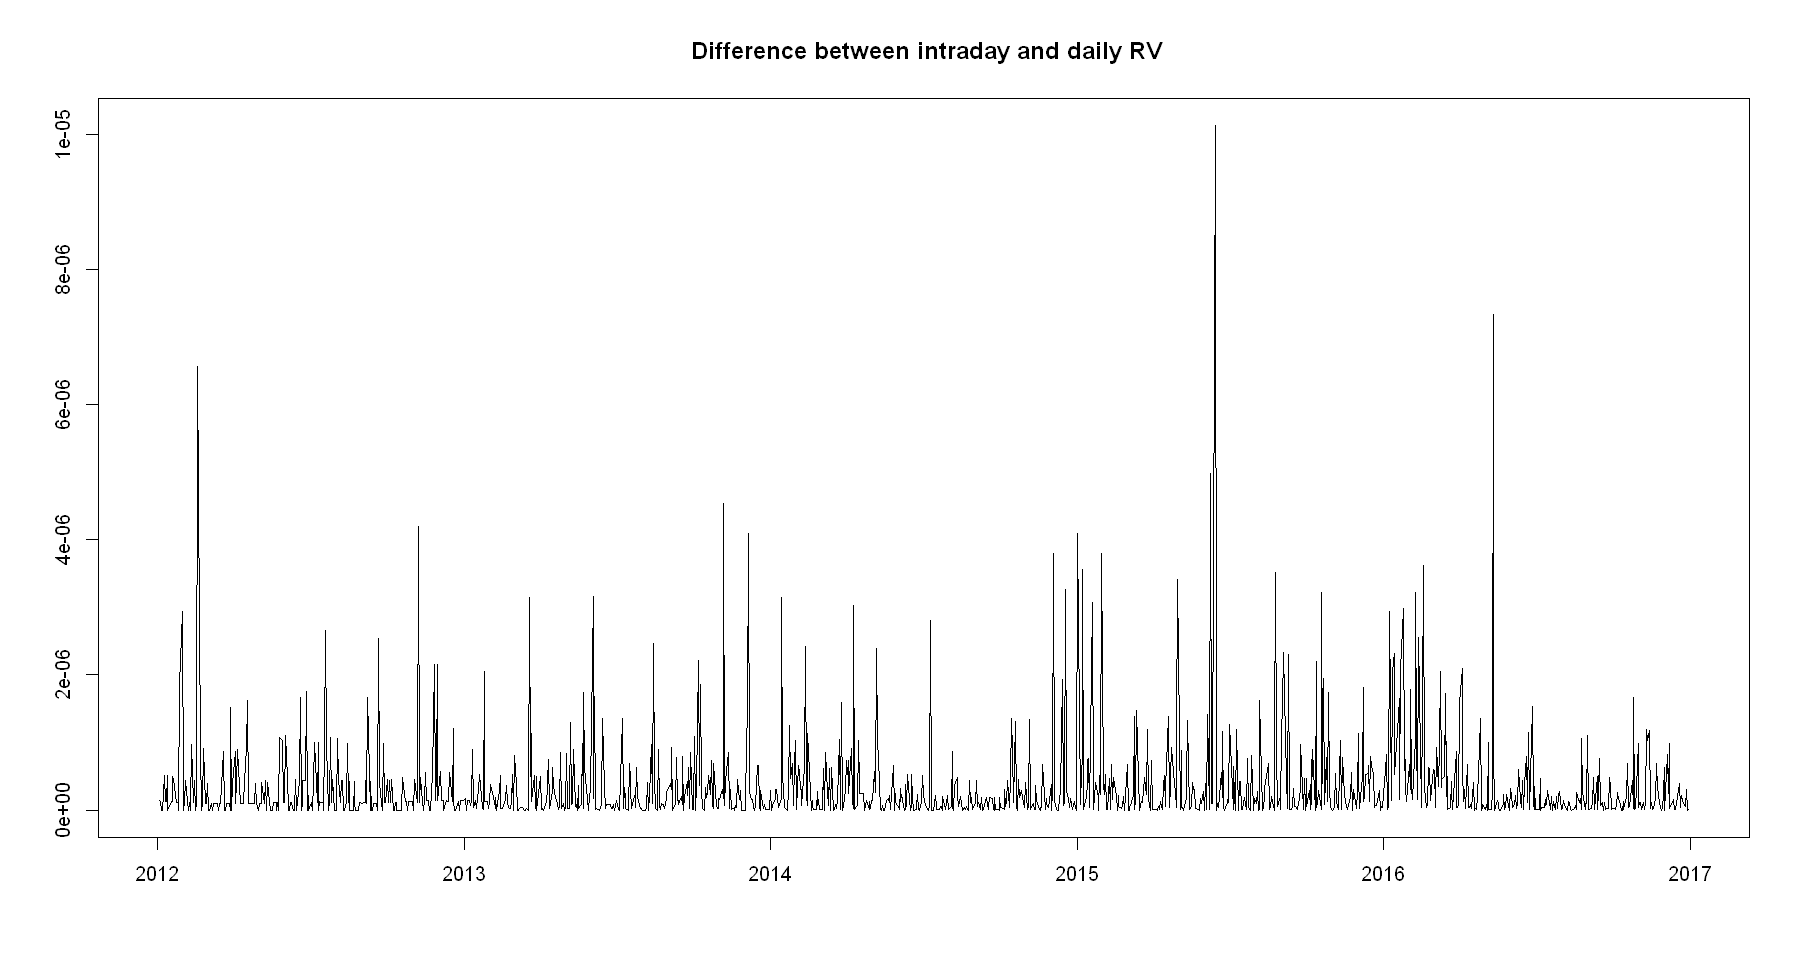

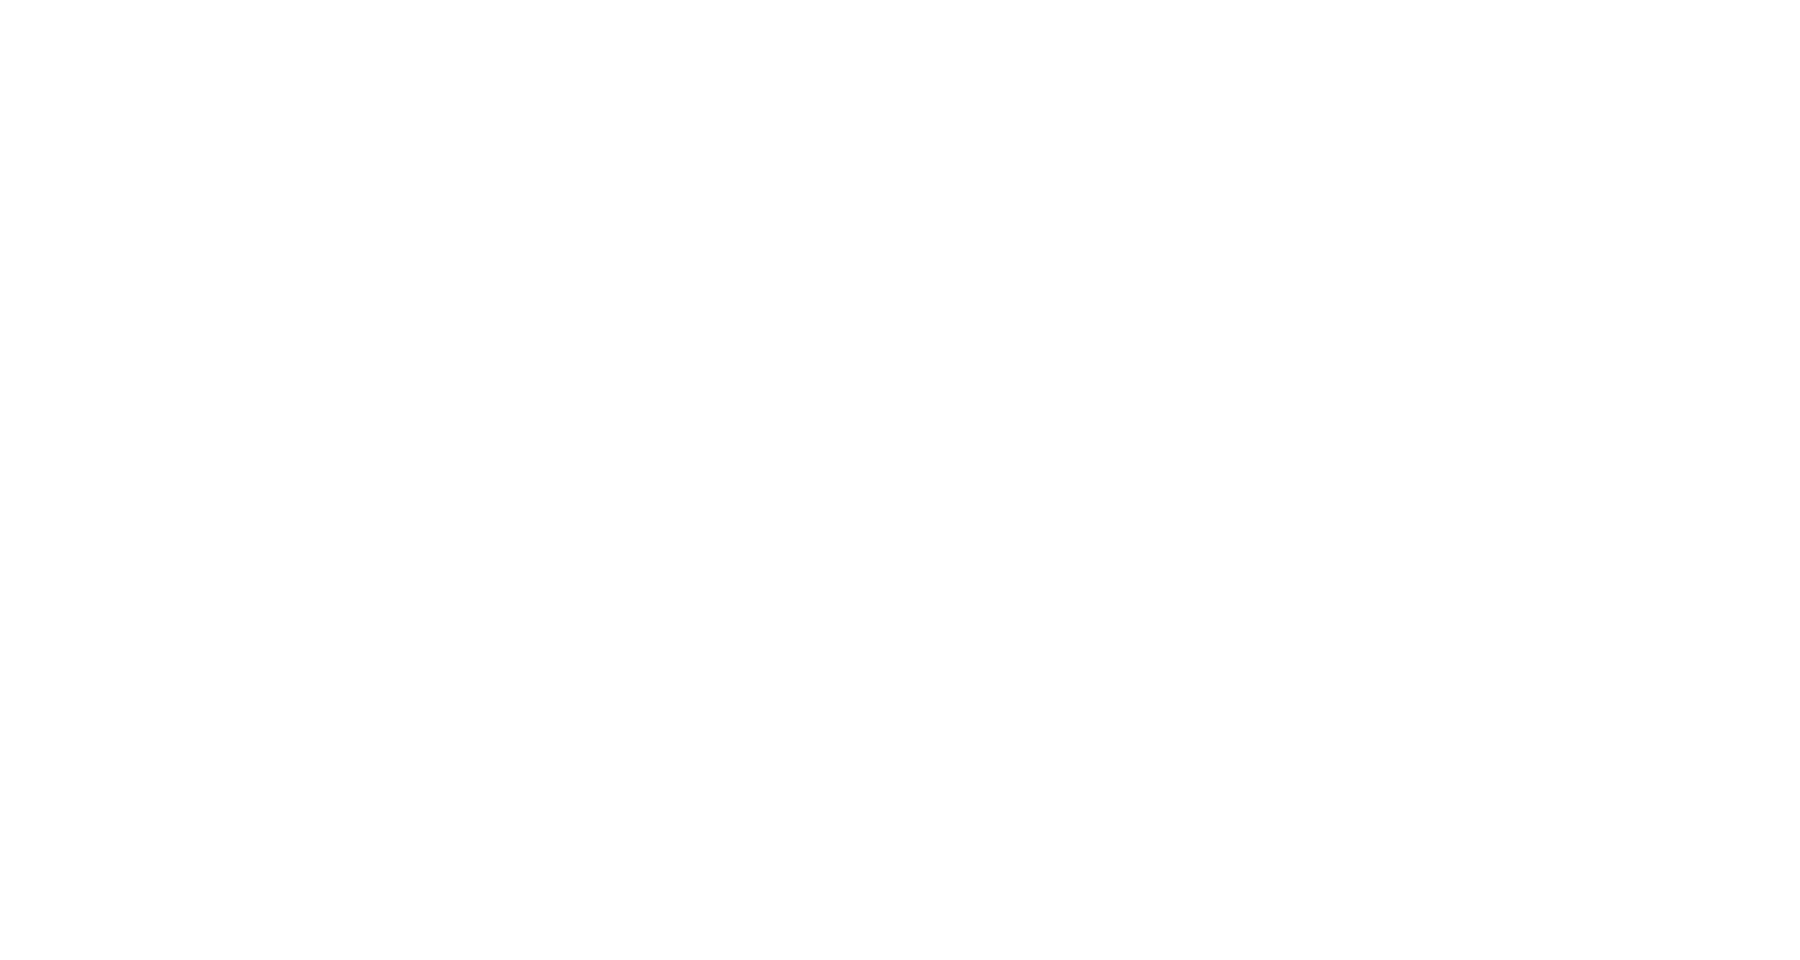

In [148]:
options(repr.plot.width =15, repr.plot.height = 8)

plot.zoo(RV_ret_BAC - RV_intra_BAC,xlab = NA, ylab=NA, main =" Difference between intraday and daily RV")
plot.zoo(RV_ret_MSFT - RV_intra_MSFT,xlab = NA, ylab=NA, main =" Difference between intraday and daily RV")
plot.zoo(RV_ret_XOM - RV_intra_XOM,xlab = NA, ylab=NA, main =" Difference between intraday and daily RV")

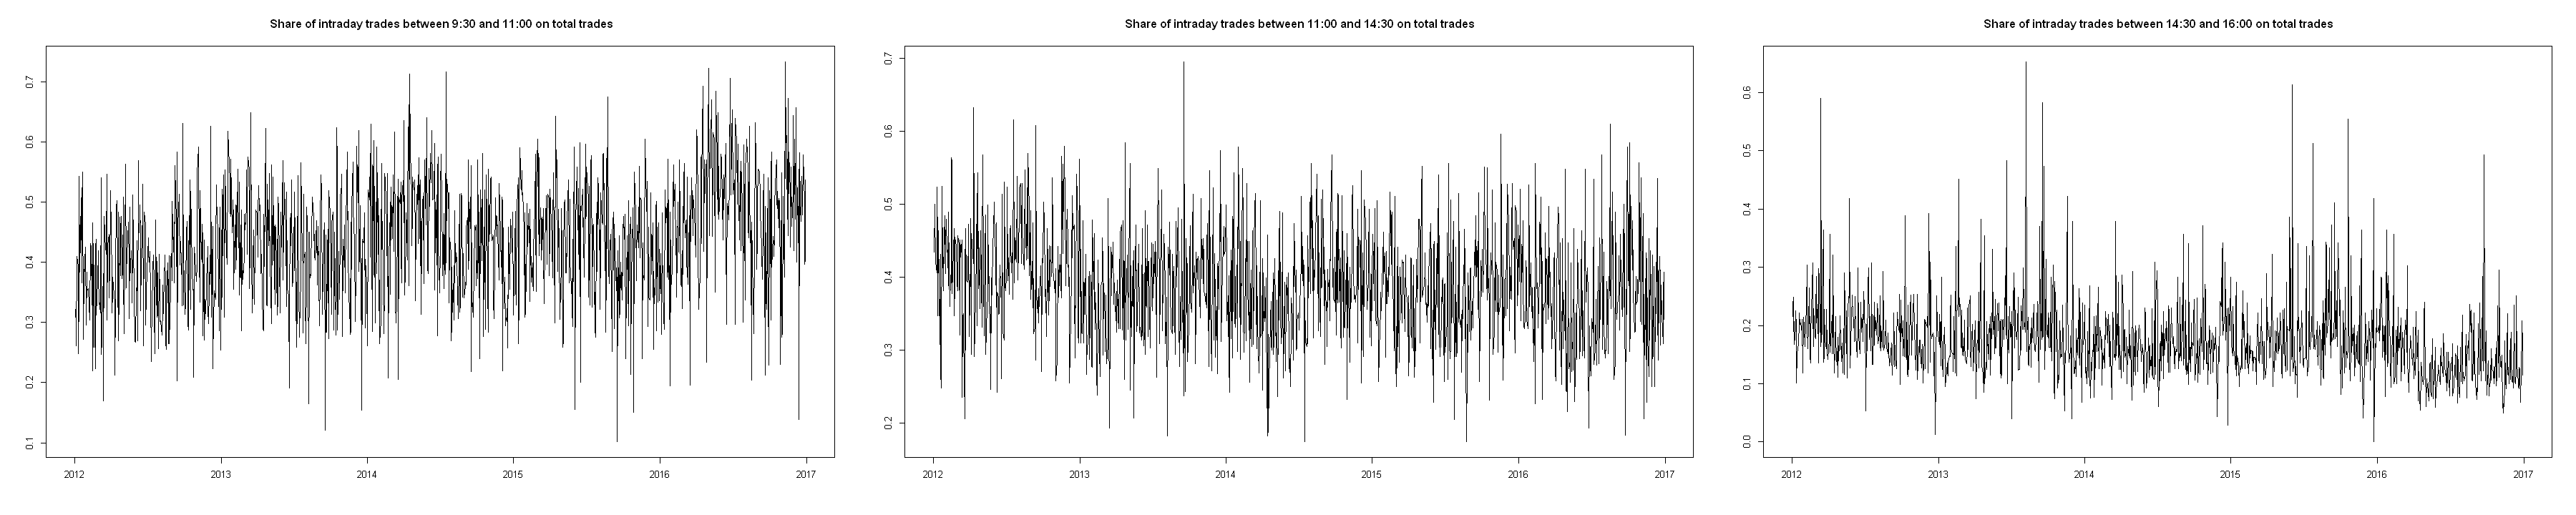

Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


ERROR: Error in plot.window(...): need finite 'xlim' values


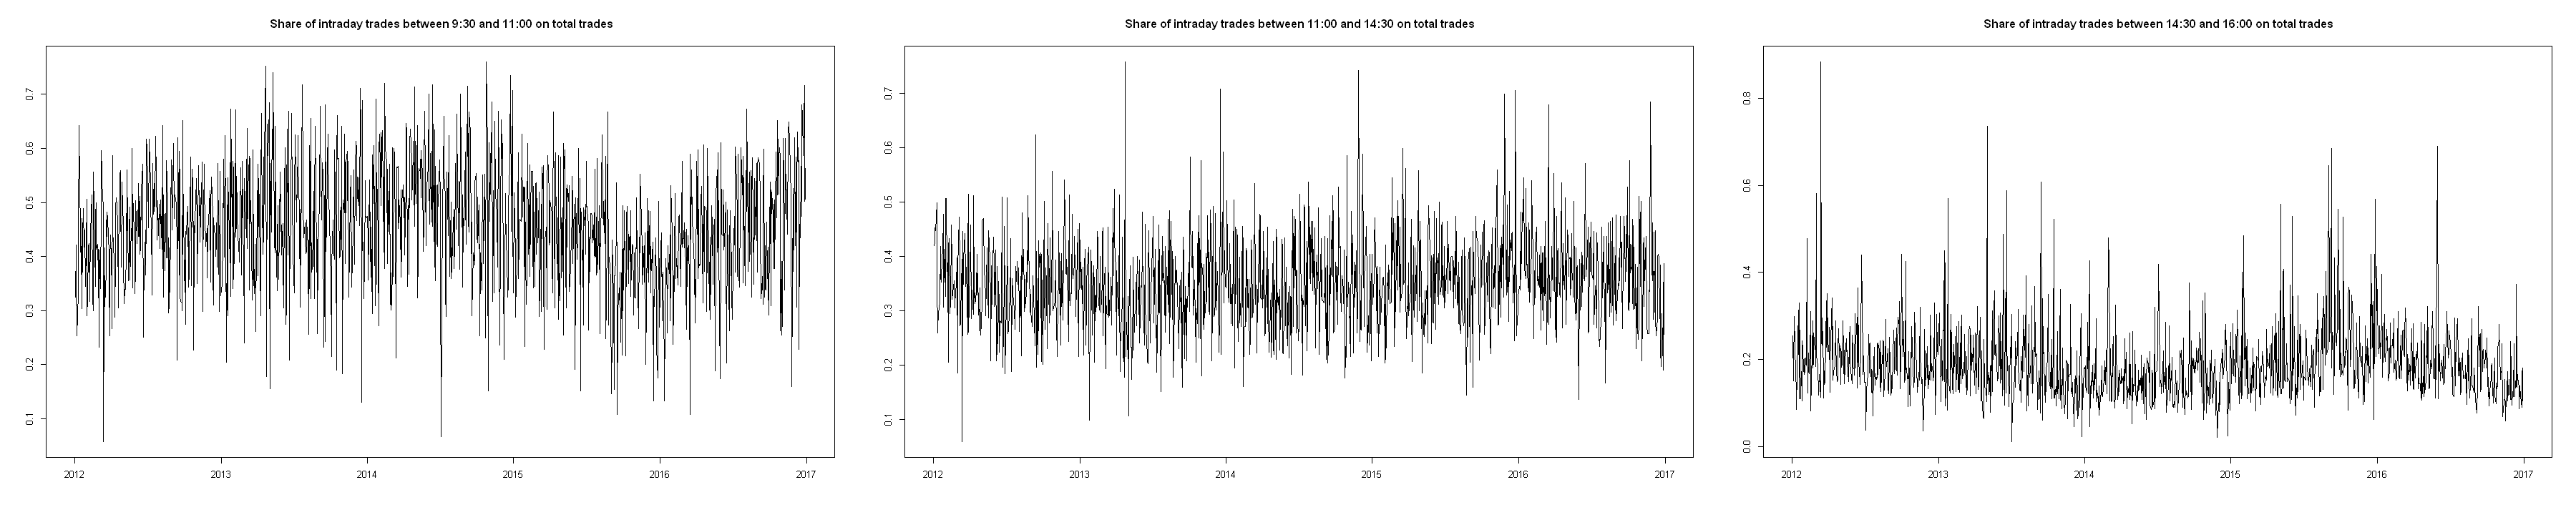

In [149]:
par(mfrow = c(1, 3))
options(repr.plot.width = 30, repr.plot.height = 6)

share_BAC_9 <- BAC_returns_9/RV_ret_BAC
plot.zoo(share_BAC_9,xlab = NA, ylab=NA, main =" Share of intraday trades between 9:30 and 11:00 on total trades")
share_BAC_11 <- BAC_returns_11/RV_ret_BAC
plot.zoo(share_BAC_11,xlab = NA, ylab=NA, main =" Share of intraday trades between 11:00 and 14:30 on total trades")
share_BAC_14 <- BAC_returns_14/RV_ret_BAC
plot.zoo(share_BAC_14,xlab = NA, ylab=NA, main =" Share of intraday trades between 14:30 and 16:00 on total trades")

share_MSFT_9 <- MSFT_returns_9/RV_ret_MSFT
plot.zoo(share_MSFT_9,xlab = NA, ylab=NA, main =" Share of intraday trades between 9:30 and 11:00 on total trades")
share_MSFT_11 <- MSFT_returns_11/RV_ret_MSFT
plot.zoo(share_MSFT_11,xlab = NA, ylab=NA, main =" Share of intraday trades between 11:00 and 14:30 on total trades")
share_MSFT_14 <- MSFT_returns_14/RV_ret_MSFT
plot.zoo(share_MSFT_14,xlab = NA, ylab=NA, main =" Share of intraday trades between 14:30 and 16:00 on total trades")

share_XOM_9 <- XOM_returns_9/RV_ret_XOM
plot.zoo(share_XOM_9,xlab = NA, ylab=NA, main =" Share of intraday trades between 9:30 and 11:00 on total trades")
share_XOM_11 <- XOM_returns_11/RV_ret_XOM
plot.zoo(share_XOM_11,xlab = NA, ylab=NA, main =" Share of intraday trades between 11:00 and 14:30 on total trades")
share_XOM_14 <- XOM_returns_14/RV_ret_XOM
plot.zoo(share_XOM_14,xlab = NA, ylab=NA, main =" Share of intraday trades between 14:30 and 16:00 on total trades")

### 9

Bipower variation

In [150]:
BPV_BAC<-rBPCov(rData=BAC,makeReturns = TRUE)
index(BPV_BAC)<-as.Date(index(BPV_BAC))
j_BAC<-RV_price_BAC-BPV_BAC

jumps_test_BAC<- BNSjumpTest(BAC,IVestimator = "BV",IQestimator = "TP")
index(jumps_test_BAC)<-as.Date(index(jumps_test_BAC))

BPV_MSFT<-rBPCov(rData=MSFT,makeReturns = TRUE)
index(BPV_MSFT)<-as.Date(index(BPV_MSFT))
j_MSFT<-RV_price_MSFT-BPV_MSFT

jumps_test_MSFT<- BNSjumpTest(MSFT,IVestimator = "BV",IQestimator = "TP")
index(jumps_test_MSFT)<-as.Date(index(jumps_test_MSFT))

BPV_XOM<-rBPCov(rData=XOM,makeReturns = TRUE)
index(BPV_XOM)<-as.Date(index(BPV_XOM))
j_XOM<-RV_price_XOM-BPV_XOM

jumps_test_XOM<- BNSjumpTest(XOM,IVestimator = "BV",IQestimator = "TP")
index(jumps_test_XOM)<-as.Date(index(jumps_test_XOM))

In [151]:
I_BAC<- ifelse(
     jumps_test_BAC[,"p.value"]  < 0.05,yes = 1,no = 0)
J_BAC <- j_BAC * I_BAC

I_MSFT<- ifelse(
     jumps_test_MSFT[,"p.value"]  < 0.05,yes = 1,no = 0)
J_MSFT <- j_MSFT * I_MSFT

I_XOM<- ifelse(
     jumps_test_XOM[,"p.value"]  < 0.05,yes = 1,no = 0)
J_XOM <- j_XOM * I_XOM

In [152]:
sum(I_BAC)

[1] 1258

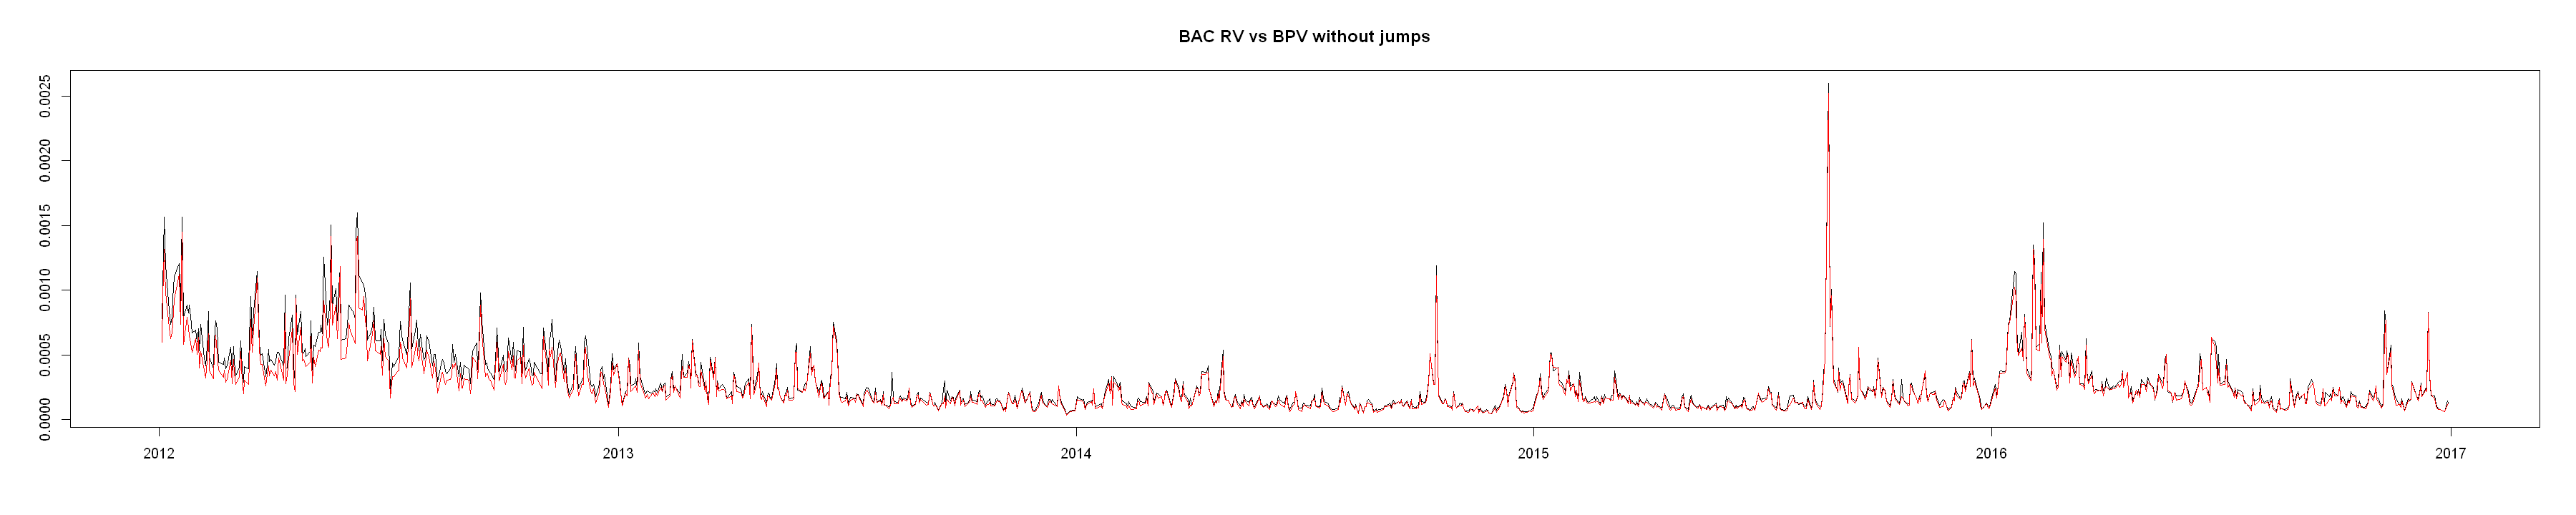

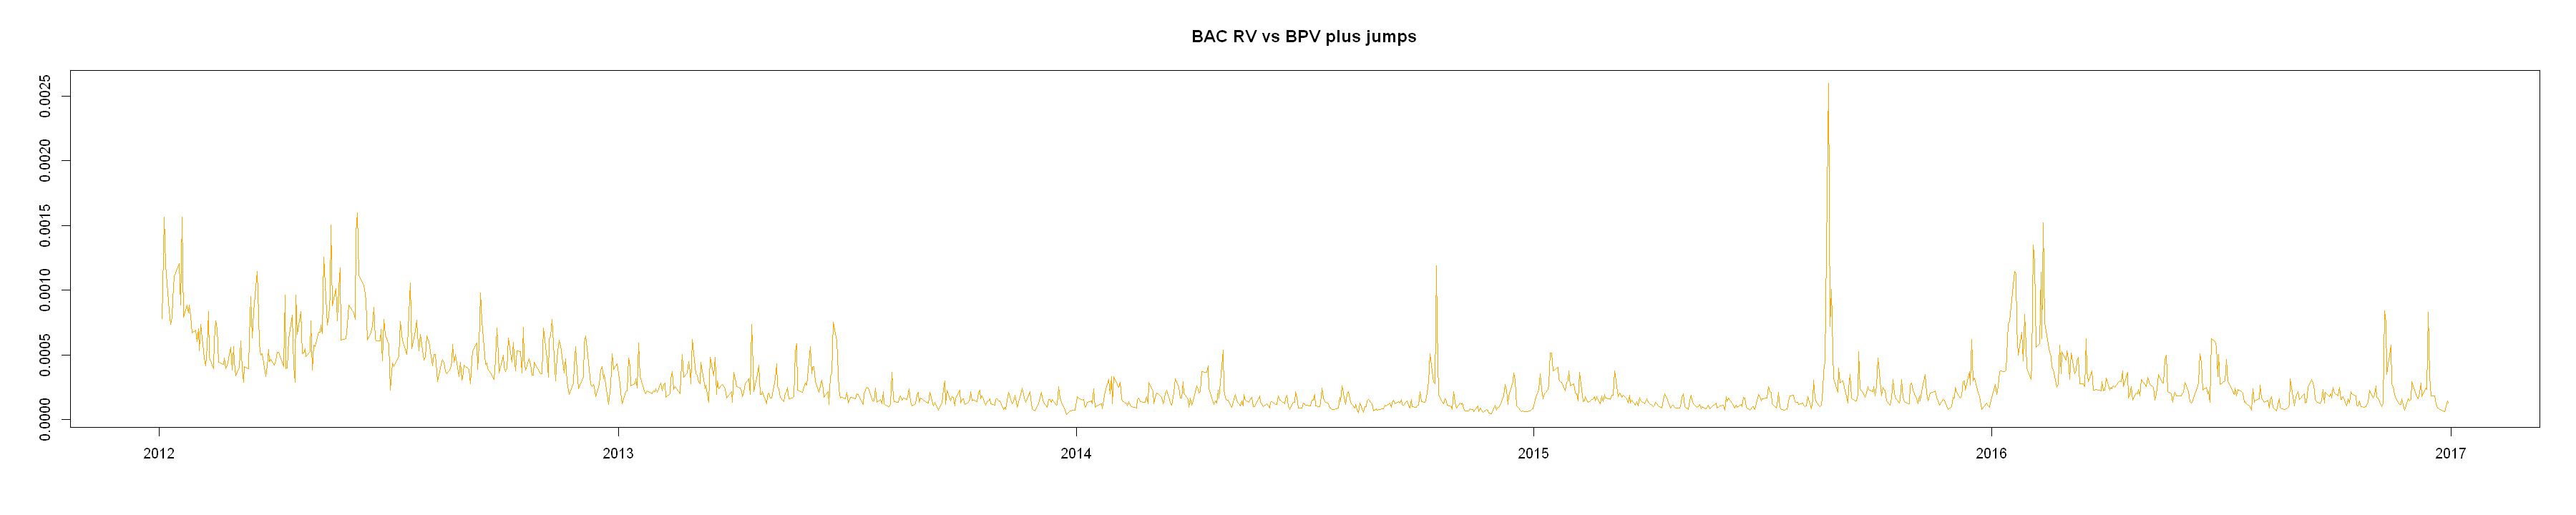

In [153]:
plot.zoo(RV_ret_BAC,xlab=NA, ylab = NA, main = 'BAC RV vs BPV without jumps')
lines(zoo(BPV_BAC), col = 'red', lwd = 1)

plot.zoo(RV_ret_BAC,xlab = NA,  ylab = NA, main = 'BAC RV vs BPV plus jumps')
lines(zoo(BPV_BAC + J_BAC), col = 'orange', lwd = 1)

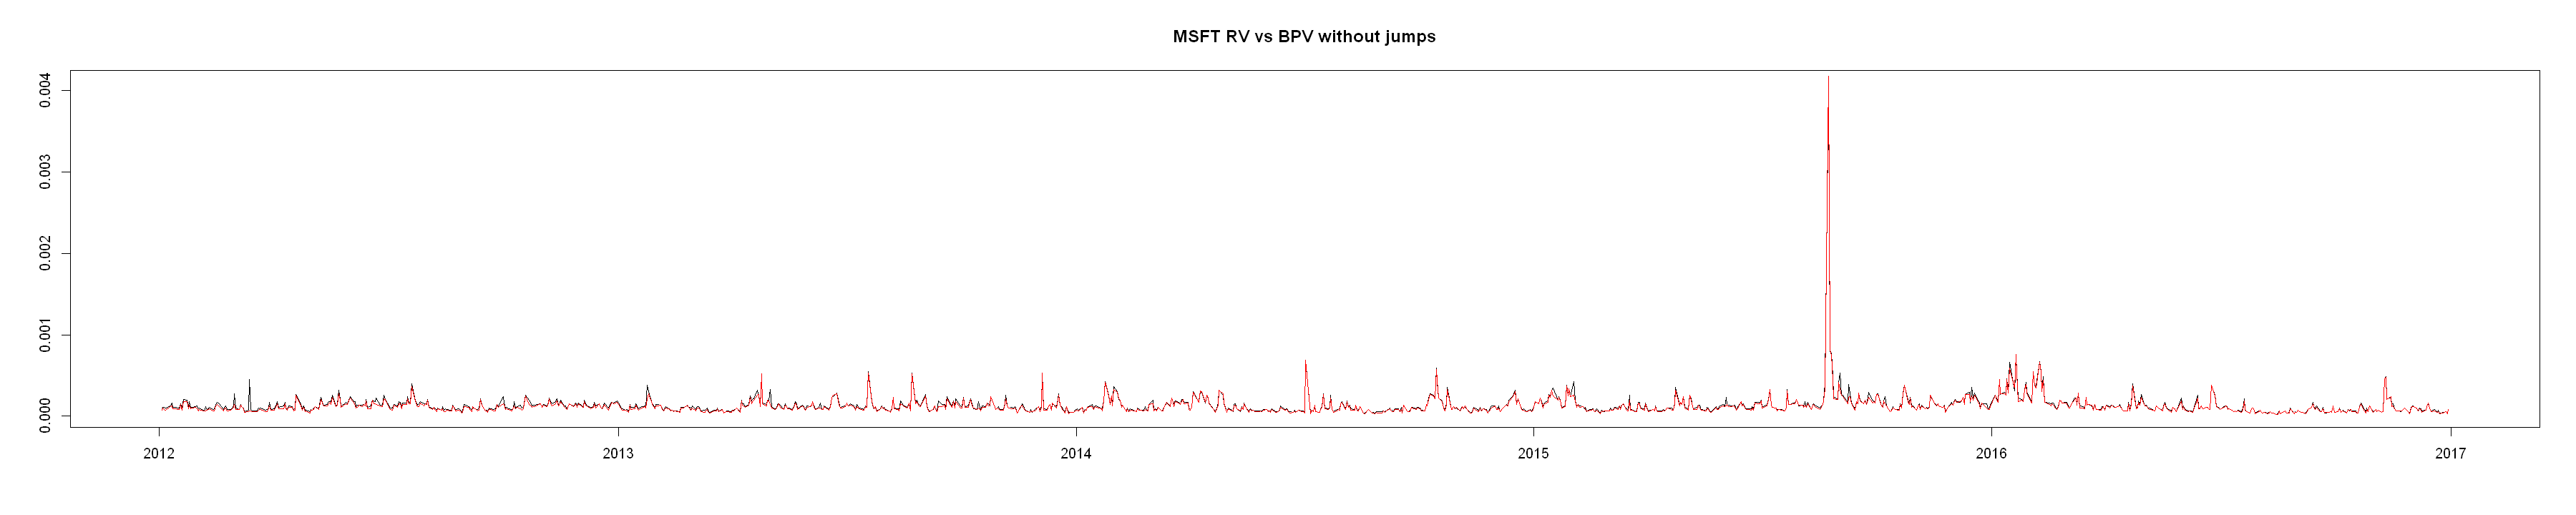

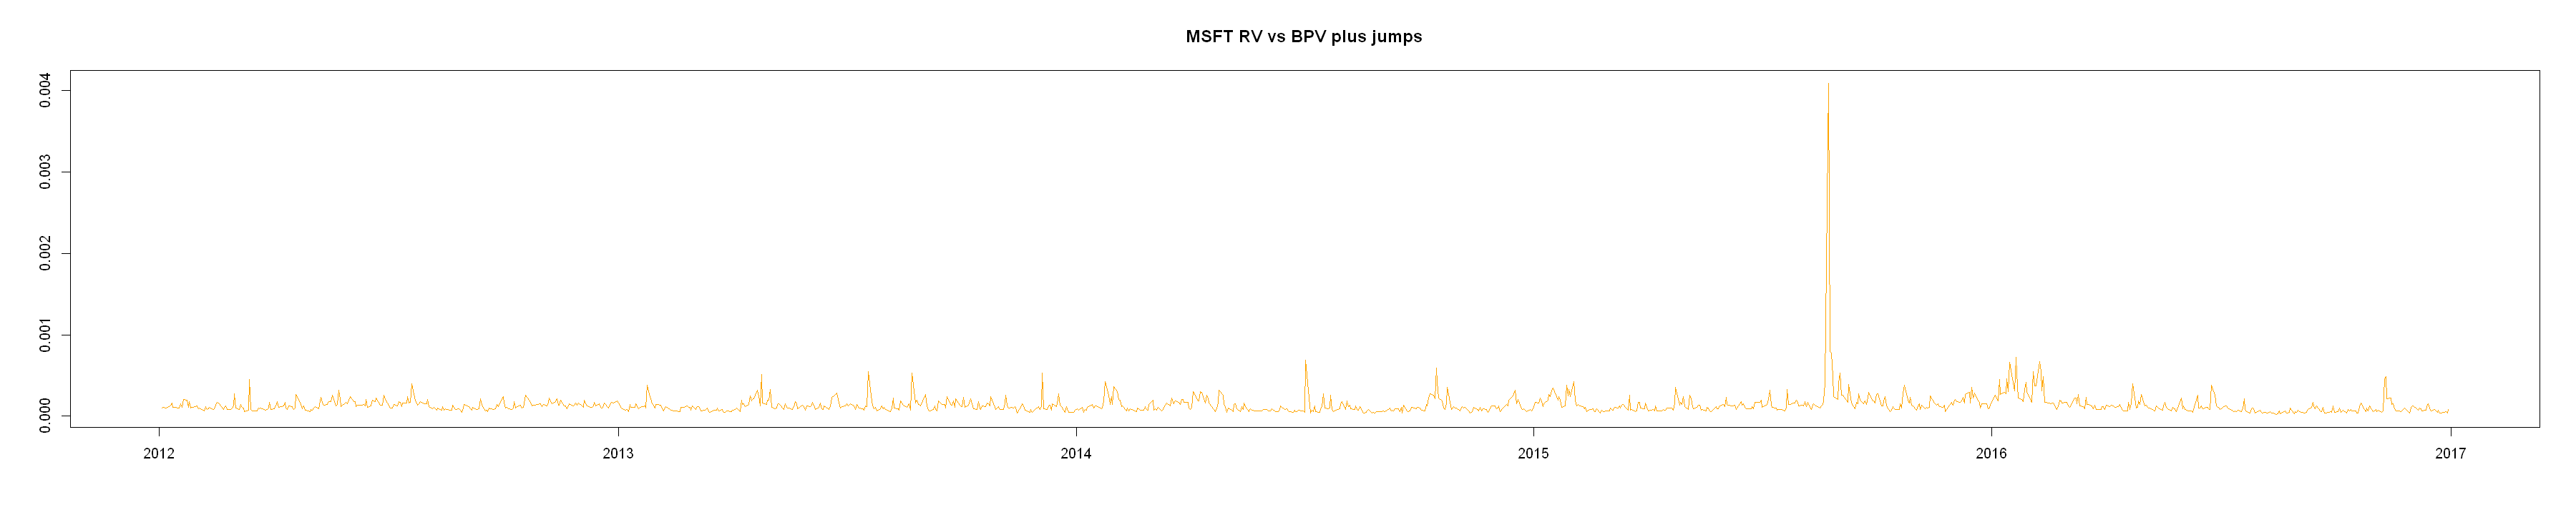

In [154]:
plot.zoo(RV_ret_MSFT,xlab=NA, ylab = NA, main = 'MSFT RV vs BPV without jumps')
lines(zoo(BPV_MSFT), col = 'red', lwd = 1)

plot.zoo(RV_ret_MSFT,xlab = NA,  ylab = NA, main = 'MSFT RV vs BPV plus jumps')
lines(zoo(BPV_MSFT + J_MSFT), col = 'orange', lwd = 1)

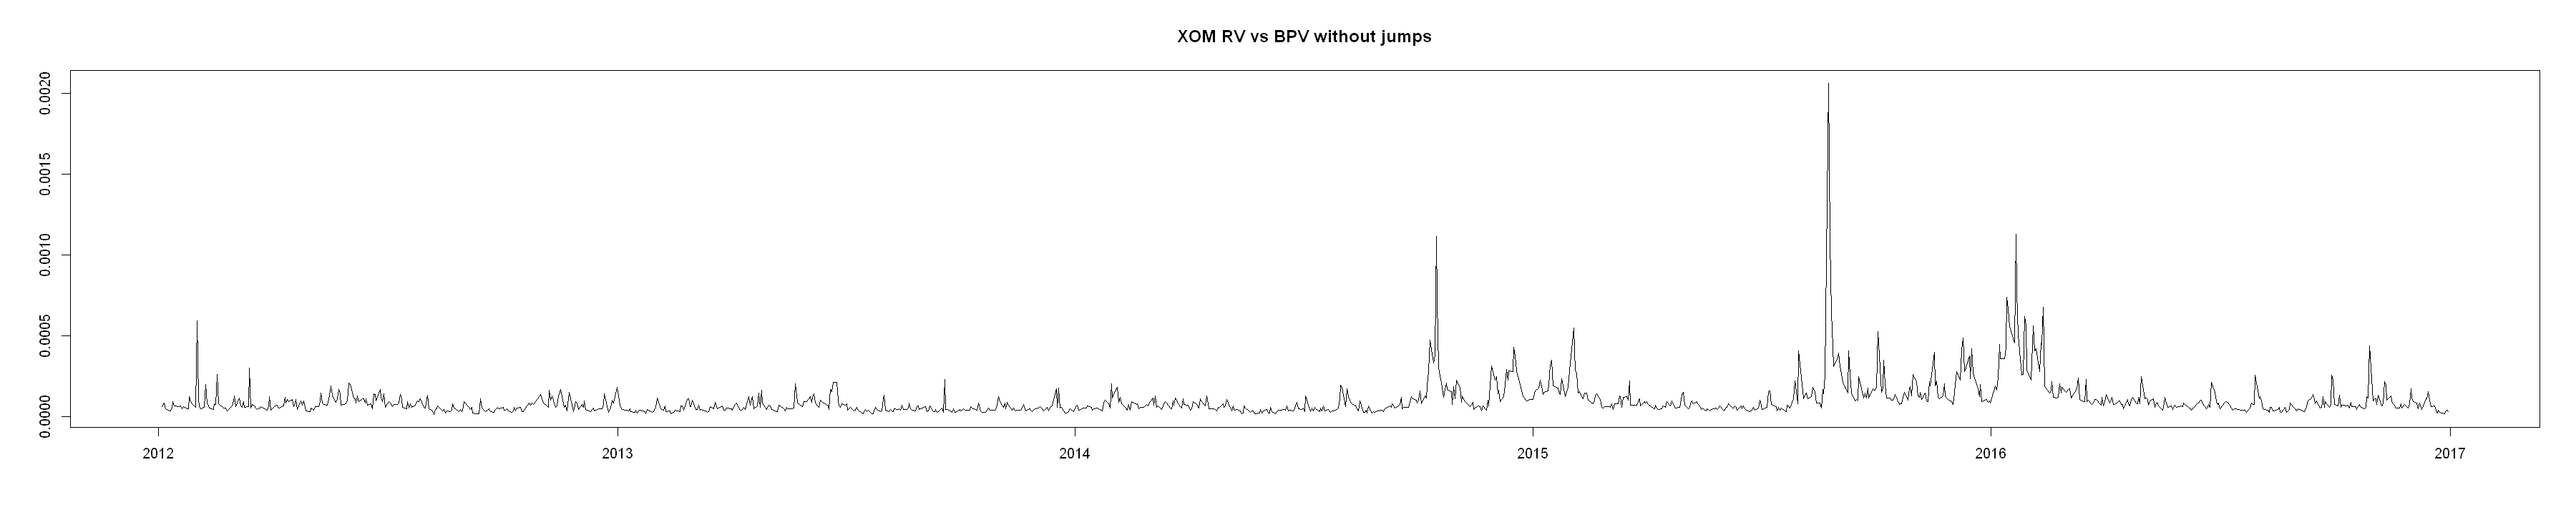

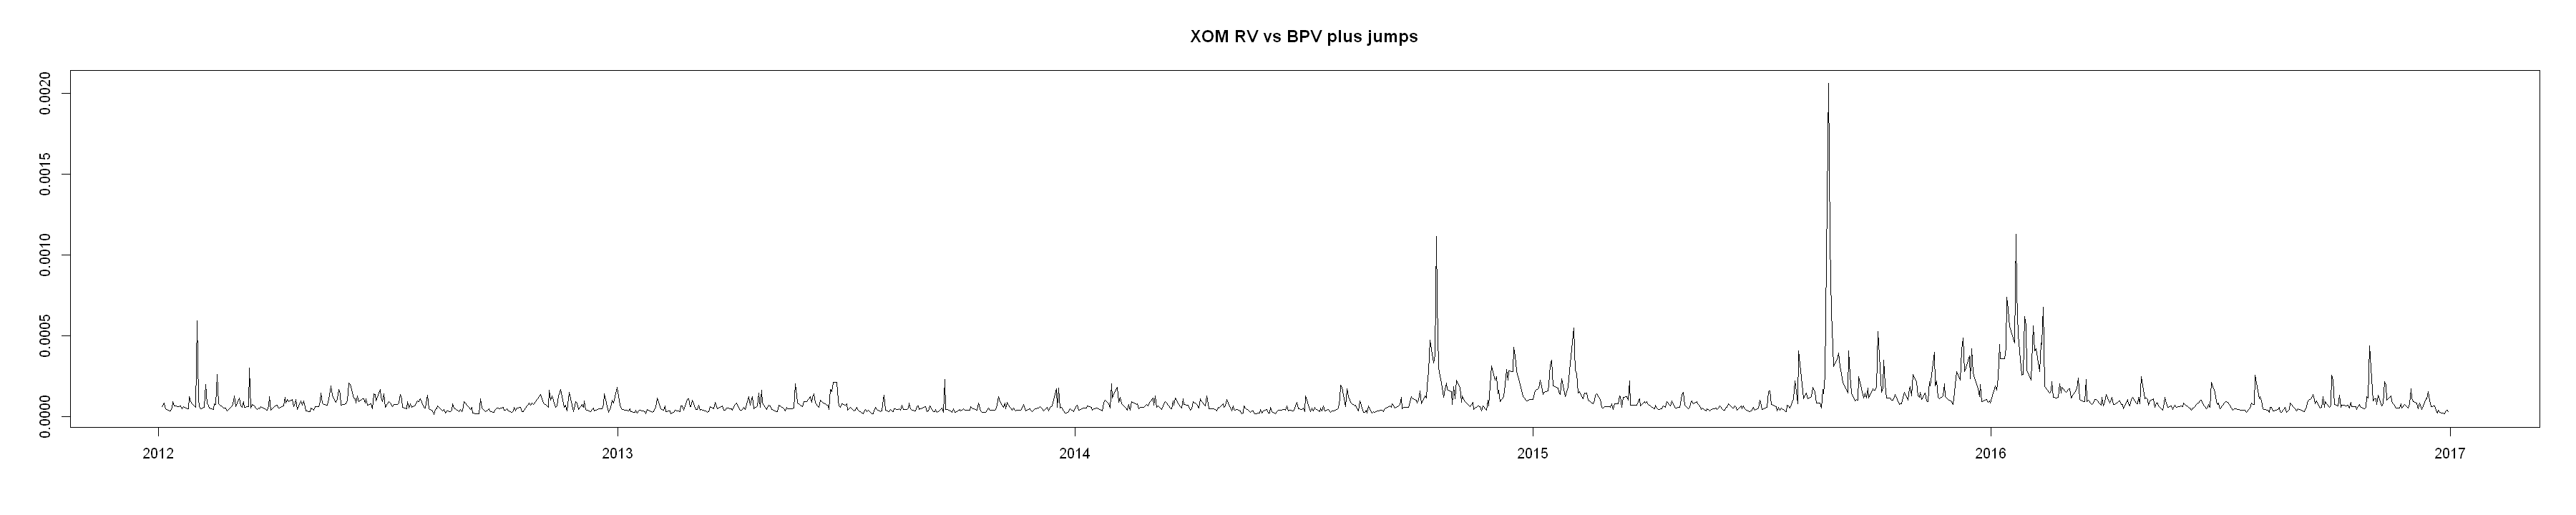

In [155]:
plot.zoo(RV_ret_XOM,xlab=NA, ylab = NA, main = 'XOM RV vs BPV without jumps')
lines(zoo(BPV_XOM), col = 'red', lwd = 1)

plot.zoo(RV_ret_XOM,xlab = NA,  ylab = NA, main = 'XOM RV vs BPV plus jumps')
lines(zoo(BPV_XOM + J_XOM), col = 'orange', lwd = 1)

MedRV (not complete)

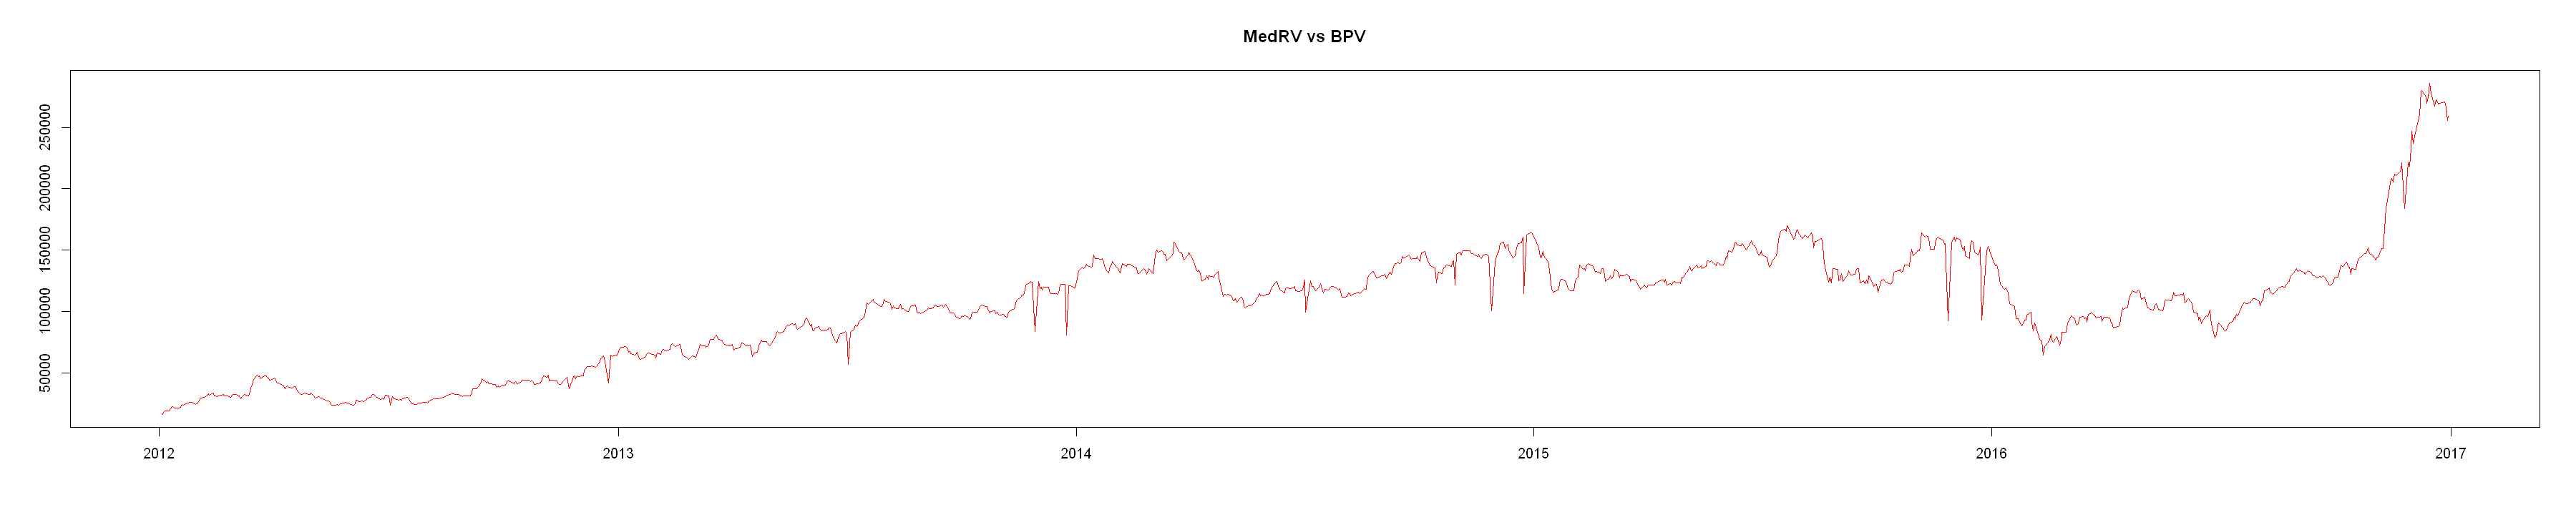

In [156]:
medRV_BAC<-rMedRVar(rData=BAC)
index(medRV_BAC)<-as.Date(index(medRV_BAC))

plot.zoo(medRV_BAC, xlab=NA, ylab=NA,main="MedRV vs BPV")
lines(zoo(medRV_BAC),col="red")

### 10 (not complete)

In [164]:
garchspec1 <- ugarchspec(mean.model = list(armaOrder = c(0, 0)),variance.model = list(garchOrder = c(1, 1)))
garchvol1 <- ugarchfit(garchspec1, BAC_returns)

ERROR: Error in xts(object@fit$sigma, D): 'order.by' cannot contain 'NA', 'NaN', or 'Inf'


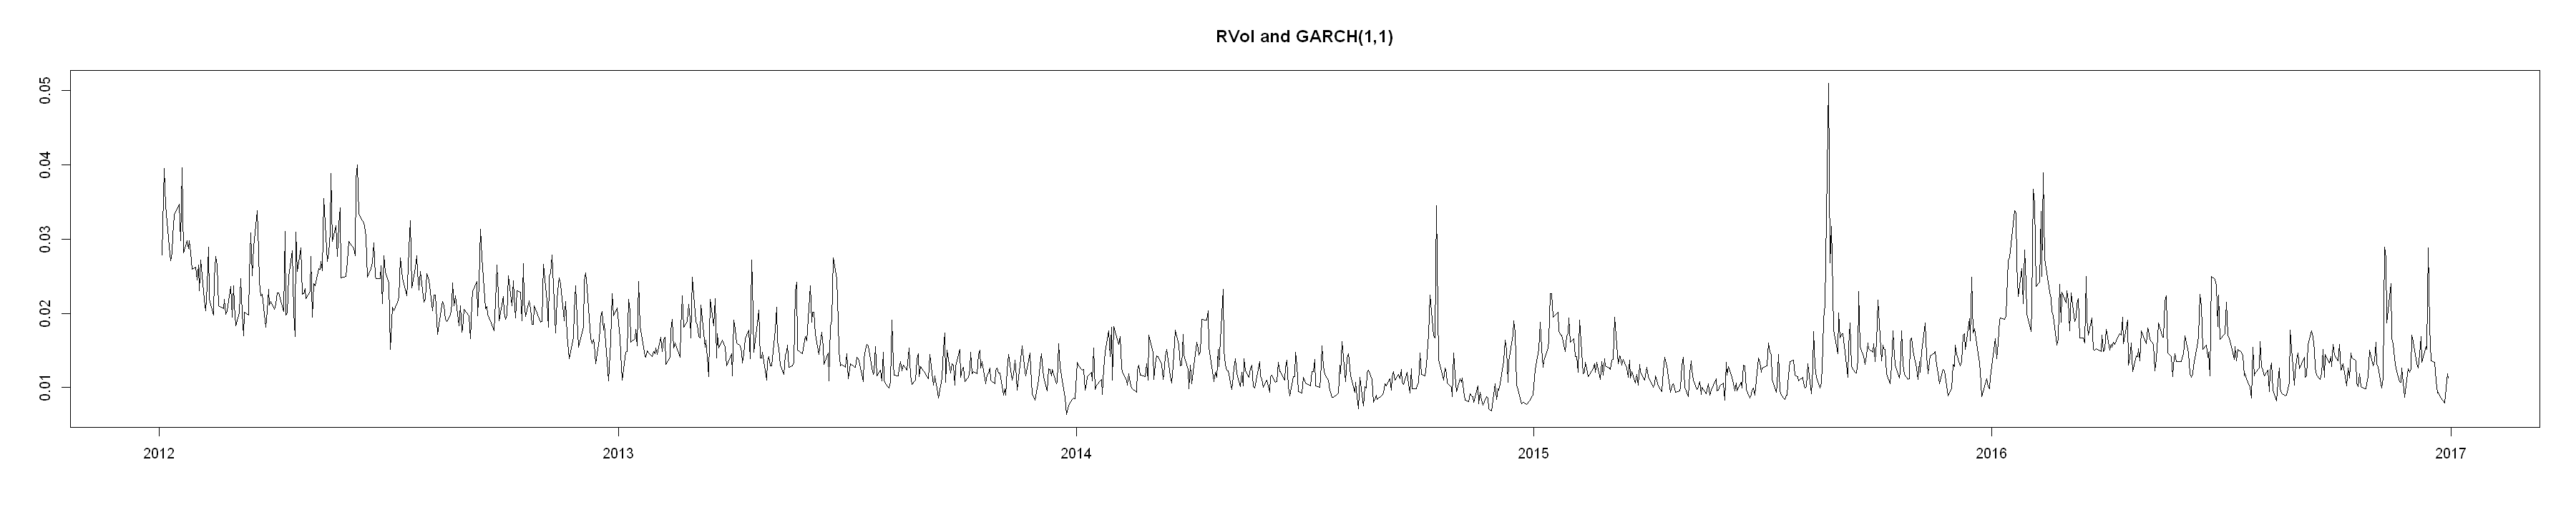

In [165]:
plot.zoo(sqrt(RV_price_BAC),xlab=NA, ylab = NA, main = 'RVol and GARCH(1,1)')
lines(zoo(sigma(garchvol1)), col = 'red', lwd = 2)

# Problem 2

We create new datasets of the 5 minutes data and then use the code from Problem 1

In [161]:
 BAC <- to.minutes5(BAC)
 MSFT <- to.minutes5(MSFT)
 XOM <- to.minutes5(XOM)

In [162]:
head(XOM)

Warning message:
"object timezone (UTC) is different from system timezone ()"


                    XOM.Open XOM.High XOM.Low XOM.Close
2012-01-03 09:34:00  69.2991  69.3393 69.2991   69.3393
2012-01-03 09:39:00  69.3554  69.5327 69.3554   69.5246
2012-01-03 09:44:00  69.5327  69.5327 69.3957   69.3957
2012-01-03 09:49:00  69.3393  69.3393 69.2749   69.2991
2012-01-03 09:54:00  69.3152  69.5407 69.3152   69.4924
2012-01-03 09:59:00  69.4521  69.4521 69.3635   69.3957

In [163]:
daily<-unique(as.Date(index(BAC)))
BAC_returns<- do.call(rbind,lapply(1:length(daily), function(x) makeReturns(BAC[as.character(daily[x])])))
                                   
daily<-unique(as.Date(index(MSFT)))
MSFT_returns<- do.call(rbind,lapply(1:length(daily), function(x) makeReturns(MSFT[as.character(daily[x])])))
                                   
daily<-unique(as.Date(index(XOM)))
XOM_returns<- do.call(rbind,lapply(1:length(daily), function(x) makeReturns(XOM[as.character(daily[x])])))

In [166]:
str(BAC_returns)
head(BAC_returns)

An xts object on 2012-01-03 09:34:00 / 2016-12-30 16:00:00 containing: 
  Data:    double [99256, 4]
  Columns: BAC.Open, BAC.High, BAC.Low, BAC.Close
  Index:   POSIXct,POSIXt [99256] (TZ: "UTC")


Warning message:
"object timezone (UTC) is different from system timezone ()"


                        BAC.Open     BAC.High      BAC.Low    BAC.Close
2012-01-03 09:34:00  0.000000000  0.000000000  0.000000000  0.000000000
2012-01-03 09:39:00  0.010378700  0.001731538  0.008647161  0.001731538
2012-01-03 09:44:00  0.000000000  0.000000000 -0.001716073  0.000000000
2012-01-03 09:49:00  0.000000000  0.000000000  0.001716073  0.000000000
2012-01-03 09:54:00 -0.001731538 -0.001731538 -0.001716073 -0.001731538
2012-01-03 09:59:00  0.000000000  0.001731538  0.001716073  0.000000000